<a href="https://colab.research.google.com/github/emgifford/Post-Graduate-Certificate-in-Data-Science-and-Business-Analytics/blob/main/egifford_USL_Project_LearnerNotebook_FullCode%2B_282_29.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning: Trade&Ahead

**Marks: 60**

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Data Overview

- Observations
- Sanity checks

In [ ]:
#allowing google colab 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/My Drive/Unsupervised Learning/Project 7/stock_data.csv")

In [ ]:
data.head()
#checking top 5 rows/columns 

Ticker Symbol                 Security             GICS Sector  \
0           AAL  American Airlines Group             Industrials   
1          ABBV                   AbbVie             Health Care   
2           ABT      Abbott Laboratories             Health Care   
3          ADBE        Adobe Systems Inc  Information Technology   
4           ADI     Analog Devices, Inc.  Information Technology   

       GICS Sub Industry  Current Price  Price Change  Volatility  ROE  \
0               Airlines         42.350        10.000       1.687  135   
1        Pharmaceuticals         59.240         8.339       2.198  130   
2  Health Care Equipment         44.910        11.301       1.274   21   
3   Application Software         93.940        13.977       1.358    9   
4         Semiconductors         55.320        -1.828       1.701   14   

   Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0          51     -604000000  7610000000              11.390   
1          77       51000000  5144000000               3.150   
2          67      938000000  4423000000               2.940   
3         180     -240840000   629551000               1.260   
4         272      315120000   696878000               0.310   

   Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
0                 668129938.500      3.718     -8.784  
1                1633015873.000     18.806     -8.750  
2                1504421769.000     15.276     -0.394  
3                 499643650.800     74.556      4.200  
4                2247993548.000    178.452      1.060

Even though "Company" is listed in the dictionary key at the start of this project, it appears Company is actually listed as "Security."

In [ ]:
data.tail()

Ticker Symbol                Security             GICS Sector  \
335          YHOO              Yahoo Inc.  Information Technology   
336           YUM         Yum! Brands Inc  Consumer Discretionary   
337           ZBH  Zimmer Biomet Holdings             Health Care   
338          ZION           Zions Bancorp              Financials   
339           ZTS                  Zoetis             Health Care   

                GICS Sub Industry  Current Price  Price Change  Volatility  \
335  Internet Software & Services         33.260        14.888       1.845   
336                   Restaurants         52.516        -8.699       1.479   
337         Health Care Equipment        102.590         9.348       1.404   
338                Regional Banks         27.300        -1.159       1.468   
339               Pharmaceuticals         47.920        16.679       1.610   

     ROE  Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
335   15         459    -1032187000 -4359082000              -4.640   
336  142          27      159000000  1293000000               2.970   
337    1         100      376000000   147000000               0.780   
338    4          99      -43623000   309471000               1.200   
339   32          65      272000000   339000000               0.680   

     Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
335                 939457327.600     28.976      6.262  
336                 435353535.400     17.682     -3.838  
337                 188461538.500    131.526    -23.884  
338                 257892500.000     22.750     -0.063  
339                 498529411.800     70.471      1.723

In [ ]:
#checking shape of data 
data.shape

(340, 15)

There are 340 rows and 15 columns in this dataset 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

There is both numerical and object (categorical data) in this dataset.

In [ ]:
#sample of the data
data.sample(n=10, random_state=1)

Ticker Symbol                     Security             GICS Sector  \
102           DVN           Devon Energy Corp.                  Energy   
125            FB                     Facebook  Information Technology   
11            AIV  Apartment Investment & Mgmt             Real Estate   
248            PG             Procter & Gamble        Consumer Staples   
238           OXY         Occidental Petroleum                  Energy   
336           YUM              Yum! Brands Inc  Consumer Discretionary   
112           EQT              EQT Corporation                  Energy   
147           HAL              Halliburton Co.                  Energy   
89            DFS  Discover Financial Services              Financials   
173           IVZ                 Invesco Ltd.              Financials   

                      GICS Sub Industry  Current Price  Price Change  \
102  Oil & Gas Exploration & Production         32.000       -15.478   
125        Internet Software & Services        104.660        16.224   
11                                REITs         40.030         7.579   
248                   Personal Products         79.410        10.661   
238  Oil & Gas Exploration & Production         67.610         0.865   
336                         Restaurants         52.516        -8.699   
112  Oil & Gas Exploration & Production         52.130       -21.254   
147      Oil & Gas Equipment & Services         34.040        -5.102   
89                     Consumer Finance         53.620         3.654   
173    Asset Management & Custody Banks         33.480         7.067   

     Volatility  ROE  Cash Ratio  Net Cash Flow   Net Income  \
102       2.924  205          70      830000000 -14454000000   
125       1.321    8         958      592000000   3669000000   
11        1.163   15          47       21818000    248710000   
248       0.806   17         129      160383000    636056000   
238       1.590   32          64     -588000000  -7829000000   
336       1.479  142          27      159000000   1293000000   
112       2.365    2         201      523803000     85171000   
147       1.966    4         189     7786000000   -671000000   
89        1.160   20          99     2288000000   2297000000   
173       1.581   12          67      412000000    968100000   

     Earnings Per Share  Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
102             -35.550                 406582278.500     93.089      1.786  
125               1.310                2800763359.000     79.893      5.884  
11                1.520                 163625000.000     26.336     -1.269  
248               3.280                 491391569.000     24.070     -2.257  
238             -10.230                 765298142.700     93.089      3.345  
336               2.970                 435353535.400     17.682     -3.838  
112               0.560                 152091071.400     93.089      9.568  
147              -0.790                 849367088.600     93.089     17.346  
89                5.140                 446887159.500     10.432     -0.376  
173               2.260                 428362831.900     14.814      4.219

Pretty varied info

In [ ]:
#copying the data to another variable to avoid any changes to original data
df = data.copy()

In [ ]:
#checking for null values
df.isnull().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

No null values

In [ ]:
#checking for duplicate values
df.duplicated().sum()

0

No duplicated values

In [ ]:
#checking to see if all ticker values are unique (looked at all as well)
df.nunique()

Ticker Symbol                   340
Security                        340
GICS Sector                      11
GICS Sub Industry               104
Current Price                   336
Price Change                    340
Volatility                      340
ROE                              82
Cash Ratio                      124
Net Cash Flow                   332
Net Income                      335
Earnings Per Share              268
Estimated Shares Outstanding    323
P/E Ratio                       295
P/B Ratio                       299
dtype: int64

Ticker Symbol is unique, some other values aren't, but they could have the same. 

**Statistical Summary**

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)#to get numbers in decimal form, not scientific notation

In [ ]:
df.describe().applymap(lambda x: f"{x:0.3f}").T

count            mean             std  \
Current Price                 340.000          80.862          98.055   
Price Change                  340.000           4.078          12.006   
Volatility                    340.000           1.526           0.592   
ROE                           340.000          39.597          96.548   
Cash Ratio                    340.000          70.024          90.421   
Net Cash Flow                 340.000    55537620.588  1946365312.176   
Net Income                    340.000  1494384602.941  3940150279.328   
Earnings Per Share            340.000           2.777           6.588   
Estimated Shares Outstanding  340.000   577028337.754   845849595.418   
P/E Ratio                     340.000          32.613          44.349   
P/B Ratio                     340.000          -1.718          13.967   

                                           min             25%            50%  \
Current Price                            4.500          38.555         59.705   
Price Change                           -47.130          -0.939          4.820   
Volatility                               0.733           1.135          1.386   
ROE                                      1.000           9.750         15.000   
Cash Ratio                               0.000          18.000         47.000   
Net Cash Flow                 -11208000000.000  -193906500.000    2098000.000   
Net Income                    -23528000000.000   352301250.000  707336000.000   
Earnings Per Share                     -61.200           1.558          2.895   
Estimated Shares Outstanding      27672156.860   158848216.100  309675137.800   
P/E Ratio                                2.935          15.045         20.820   
P/B Ratio                              -76.119          -4.352         -1.067   

                                         75%              max  
Current Price                         92.880         1274.950  
Price Change                          10.695           55.052  
Volatility                             1.696            4.580  
ROE                                   27.000          917.000  
Cash Ratio                            99.000          958.000  
Net Cash Flow                  169810750.000  20764000000.000  
Net Income                    1899000000.000  24442000000.000  
Earnings Per Share                     4.620           50.090  
Estimated Shares Outstanding   573117457.325   6159292035.000  
P/E Ratio                             31.765          528.039  
P/B Ratio                              3.917          129.065

The mean current price is $80.86

Some negative values are present for Net Cash Flow, Net Income, Earnings Per Share, and P/B Ratio, maybe could indicate losses 

**Categorical/Non-numerical Summary**

In [ ]:
#summary of categorical/non-numerical values
data.describe(include='object').T

count unique                                 top freq
Ticker Symbol       340    340                                 AAL    1
Security            340    340             American Airlines Group    1
GICS Sector         340     11                         Industrials   53
GICS Sub Industry   340    104  Oil & Gas Exploration & Production   16

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

**Univariate Analysis of Numerical Values**

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

**Current Price**

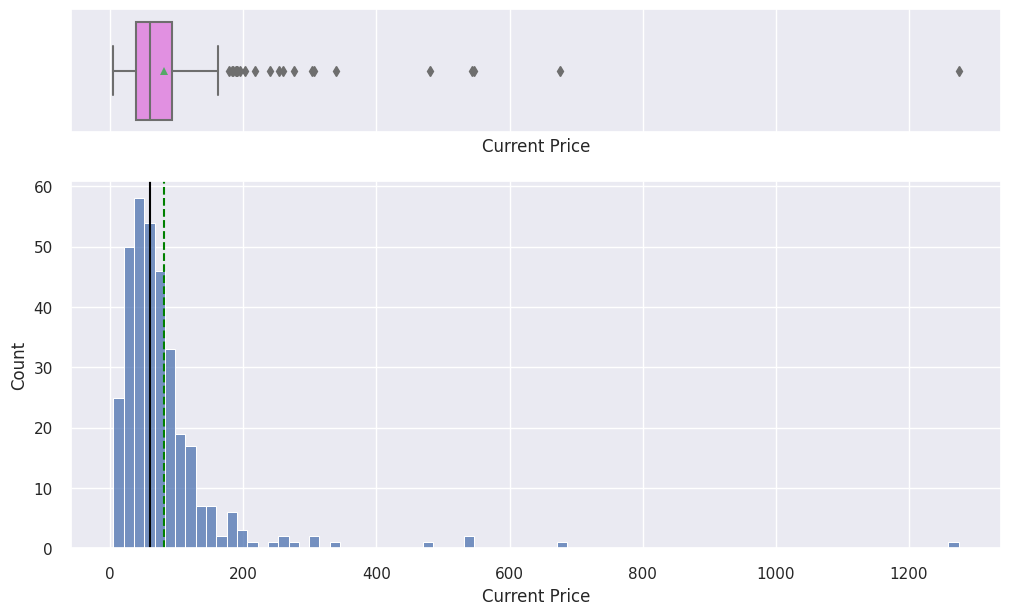

In [ ]:
histogram_boxplot(df, 'Current Price')

Appears right skewed

**Price Change**

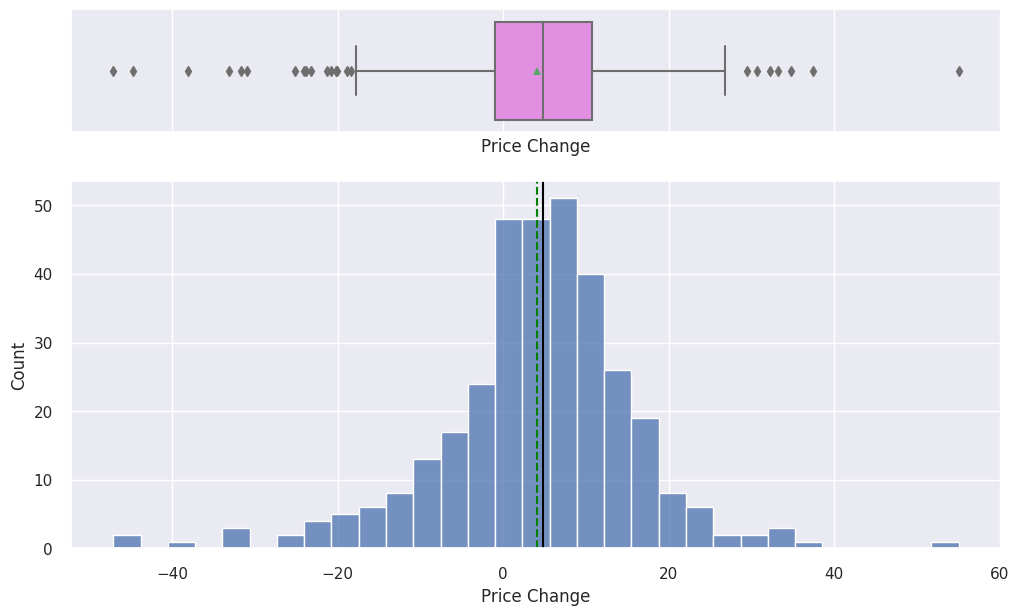

In [ ]:
histogram_boxplot(df, 'Price Change')

Fairly normally distributed

**Volatility**

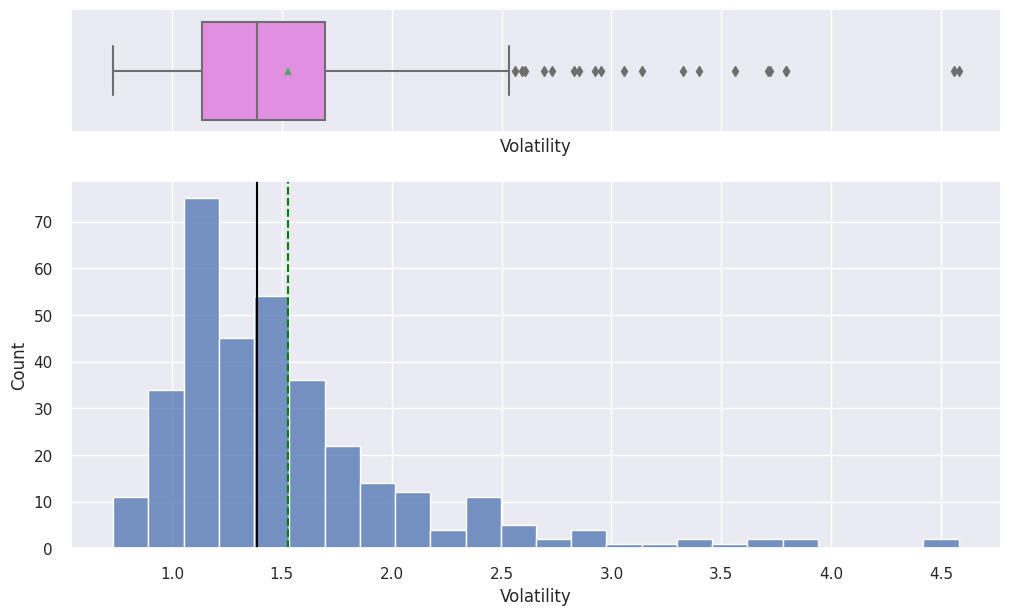

In [ ]:
histogram_boxplot(df, 'Volatility')

Right skewed

**ROE**

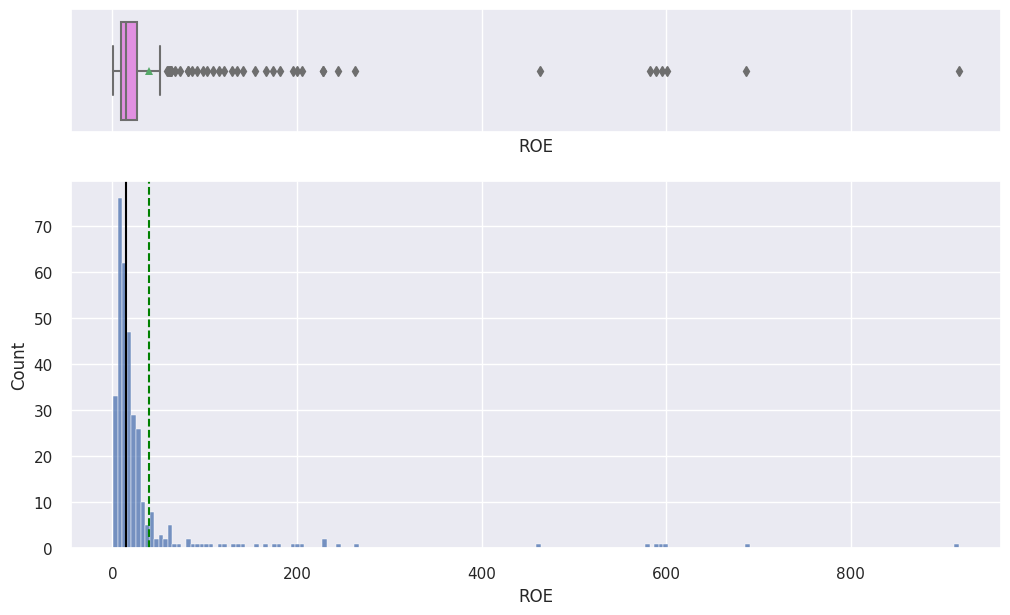

In [ ]:
histogram_boxplot(df, 'ROE')

Very right skewed

**Cash Ratio**

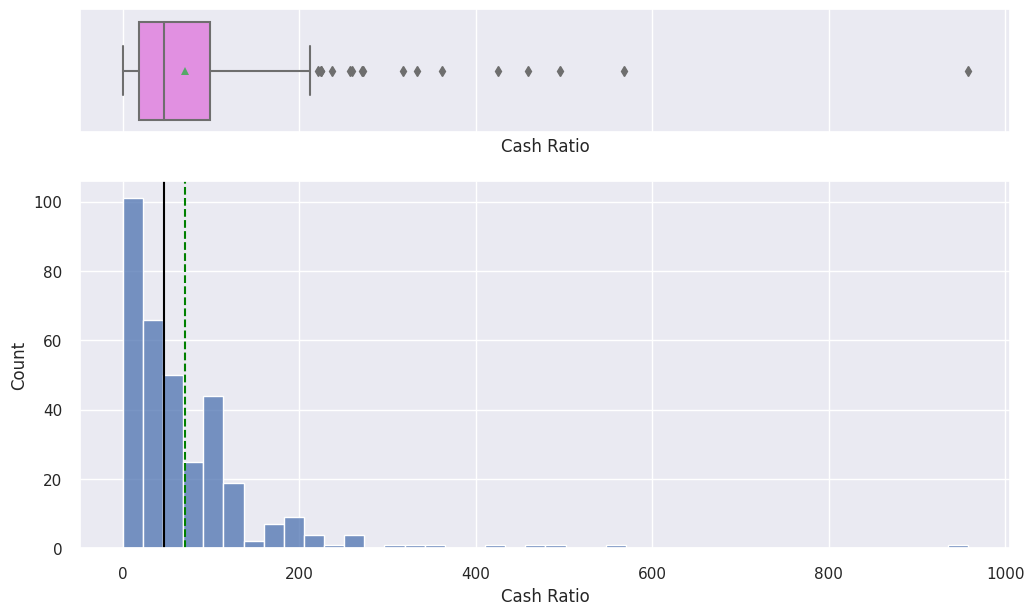

In [ ]:
histogram_boxplot(df, 'Cash Ratio')

Right skewed

**Net Cash Flow**

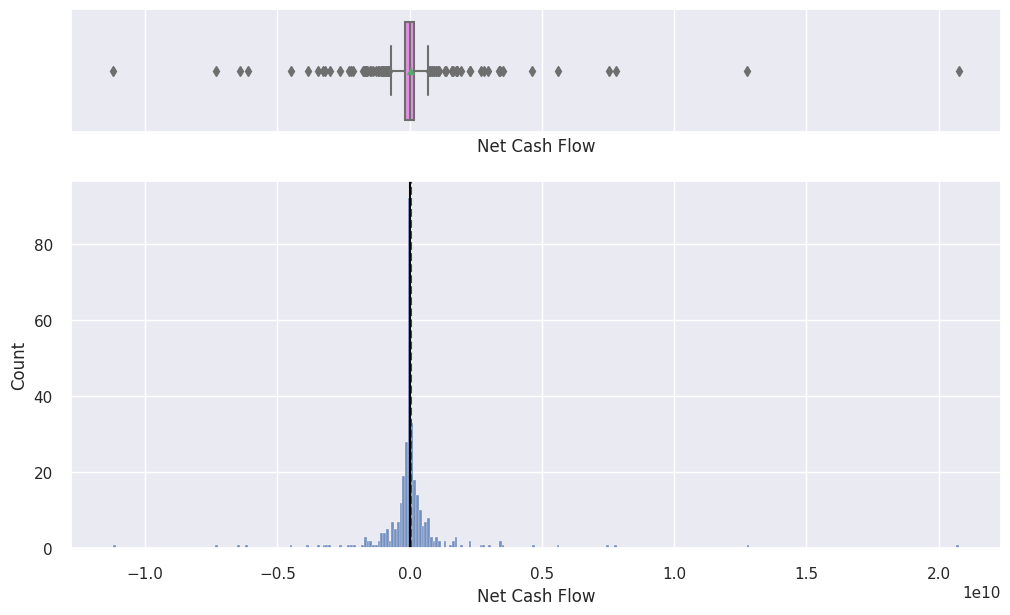

In [ ]:
histogram_boxplot(df, 'Net Cash Flow')

Pretty normally distributed

**Earnings Per Share**

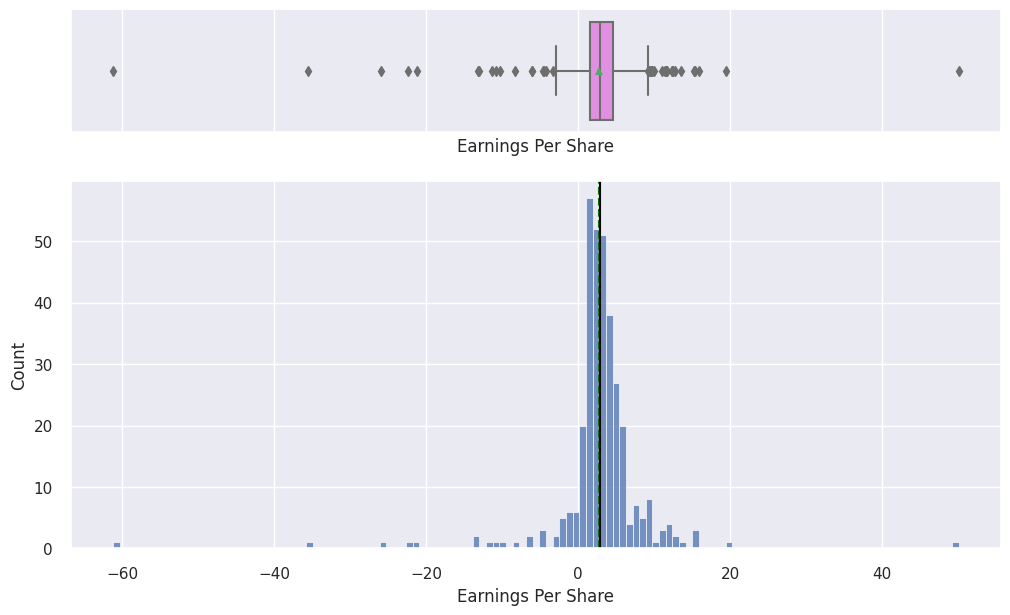

In [ ]:
histogram_boxplot(df, 'Earnings Per Share')

A little skewed, but more or less normally distributed

**Estimated Shares Outstanding**

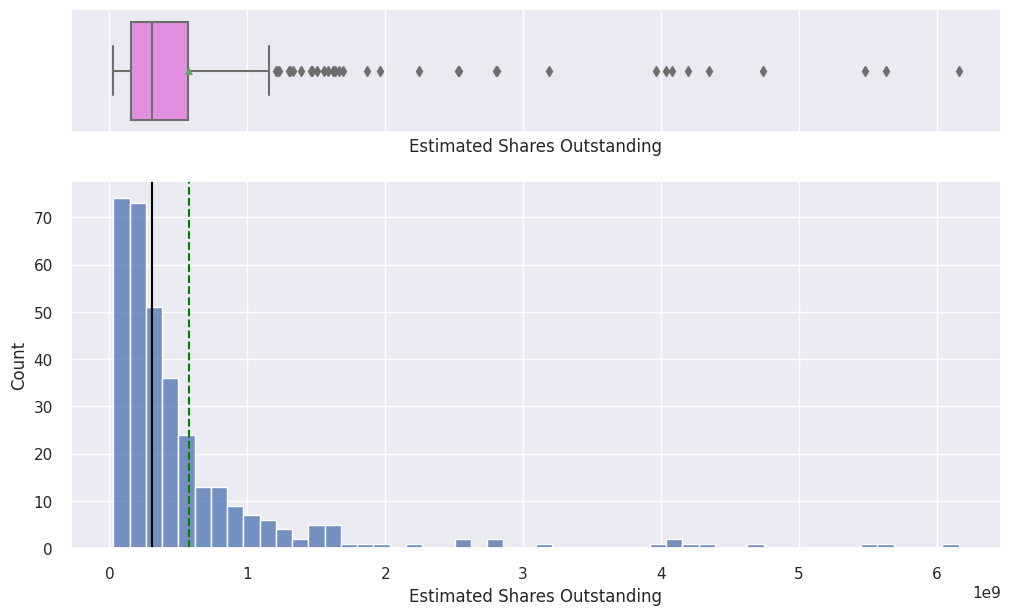

In [ ]:
histogram_boxplot(df, 'Estimated Shares Outstanding') 

Pretty right skewed

**P/E Ratio**

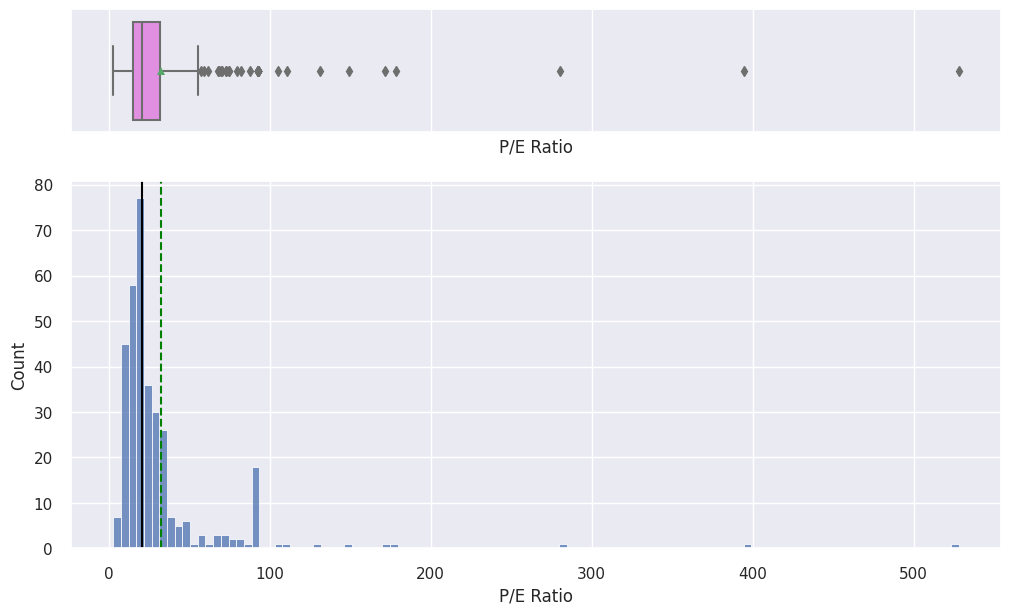

In [ ]:
histogram_boxplot(df, 'P/E Ratio') 

Right skewed

**P/B Ratio**

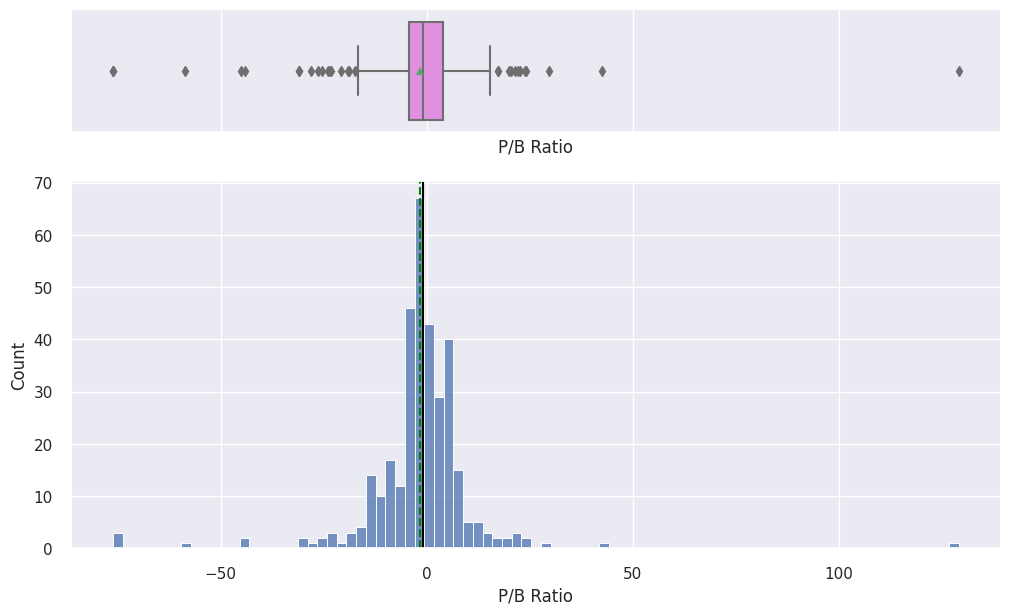

In [ ]:
histogram_boxplot(df, 'P/B Ratio') 

More or less normally distributed

**Categorical Data Univariate Analysis**

In [ ]:
# function to create labeled barplots


def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**GICS Sector**

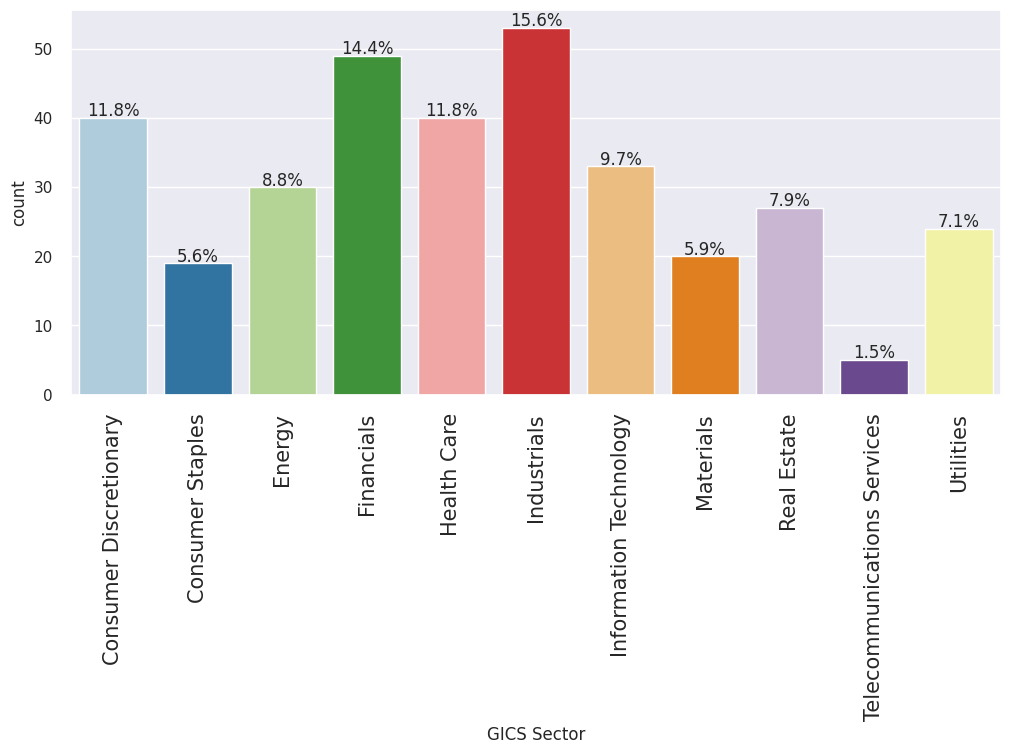

In [ ]:
labeled_barplot(df, 'GICS Sector', perc=True)

The Industrials sector makes up 15.6% of the stocks, of which appears to be the majority value, followed somewhat closely by Financials at 14.4%, then at tie for Health Care at 11.8% and Consumer Discretionary at 11.8%. However, it is notable that there are many industry categories that are listed here that are mostly in the 5% to 9% range. However, Telecommunications Services is at 1.5%, the lowest listed. 

**GICS Sub Industry**

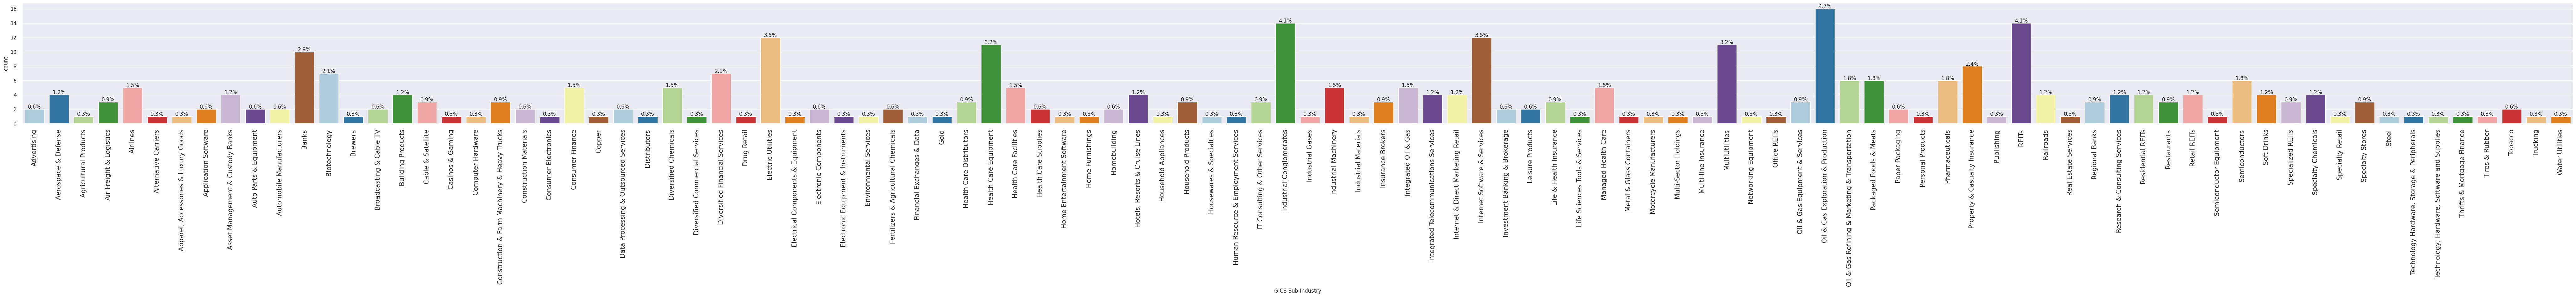

In [ ]:
labeled_barplot(df, 'GICS Sub Industry', perc=True)

Of the sub industries, the sub-category Oil & Gas Exploration & Production appears to be the highest at 4.7% followed by a tie: Industrial Conglomerates at 4.1% and REITs (looked it up this appears to be within the financial industry) at 4.1%. Electrical Utilities is at 3.5%, tied at Internet Software & Services also at 3.5%. 

**Bivariate Analysis**

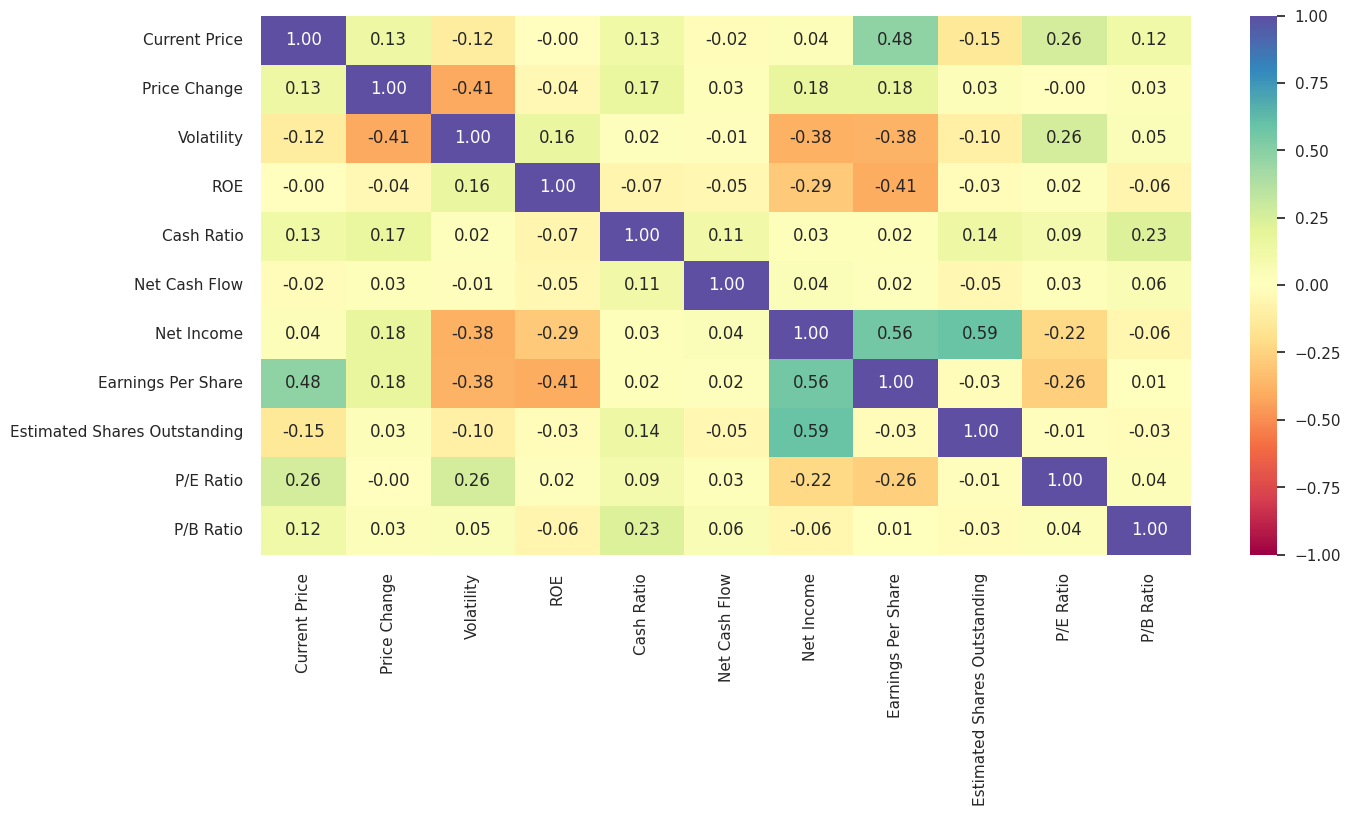

In [ ]:
# correlation check
plt.figure(figsize=(15, 7))
sns.heatmap(
    df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Estimated Shares Outstanding appears to have a positive correlation with Net Income at 0.59, which makes sense. Earning Per Share and Net Income also have a positive correlation at 0.56. Earning Per Share and Current Price also have a somewhat positive correlation at 0.48. 

There are some negative somewhat weak correlations as well--namely Earnings Per Share Outstanding and ROE at -0.41 along with Volatility and Price Change at -0.41 as well. Other than these features, there is not a lot of notable correlations. 



**Checking the stocks of which economic sector have seen the maximum price increase on average.**

**GICS Sector and Price Change**

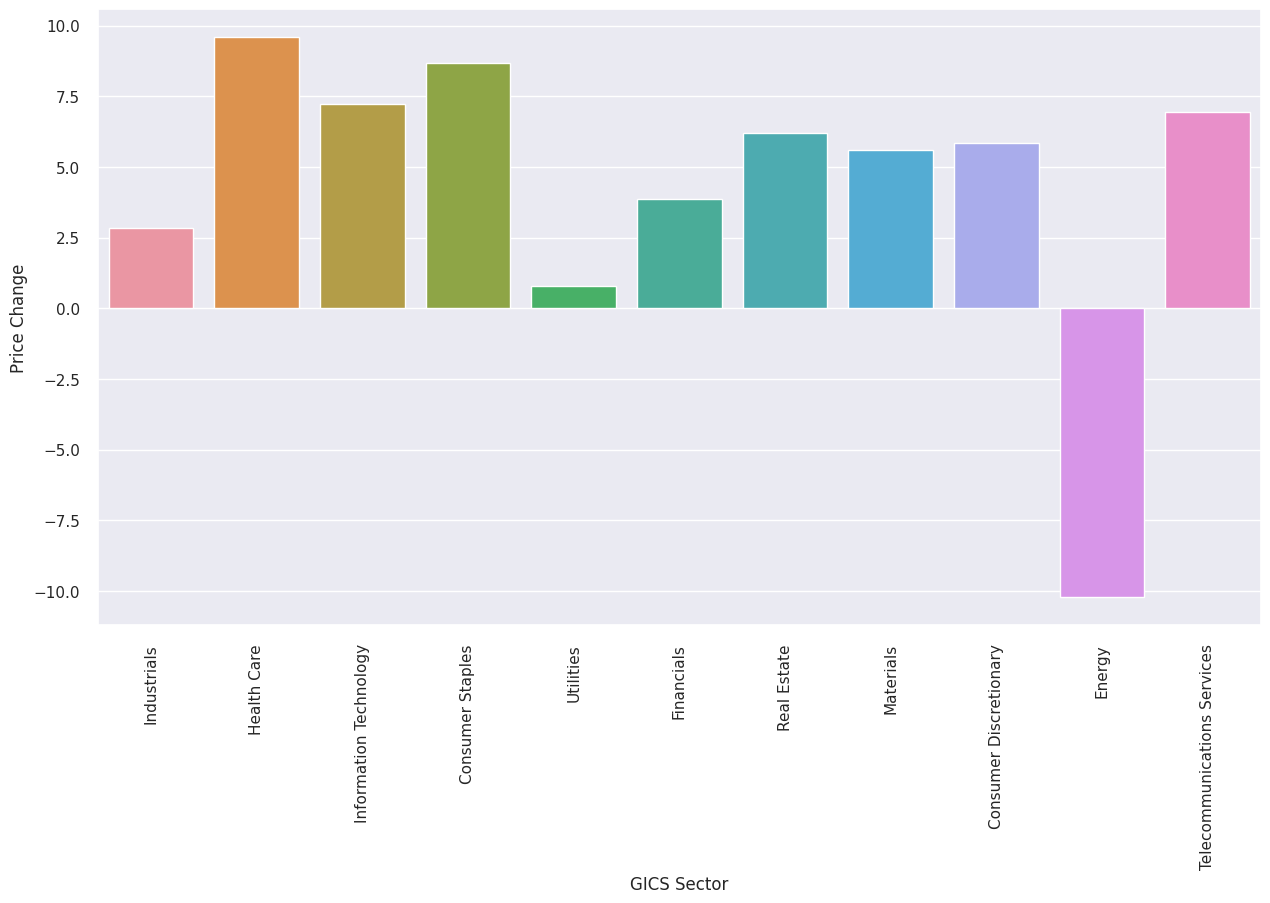

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Price Change', ci=False)
plt.xticks(rotation=90)
plt.show()

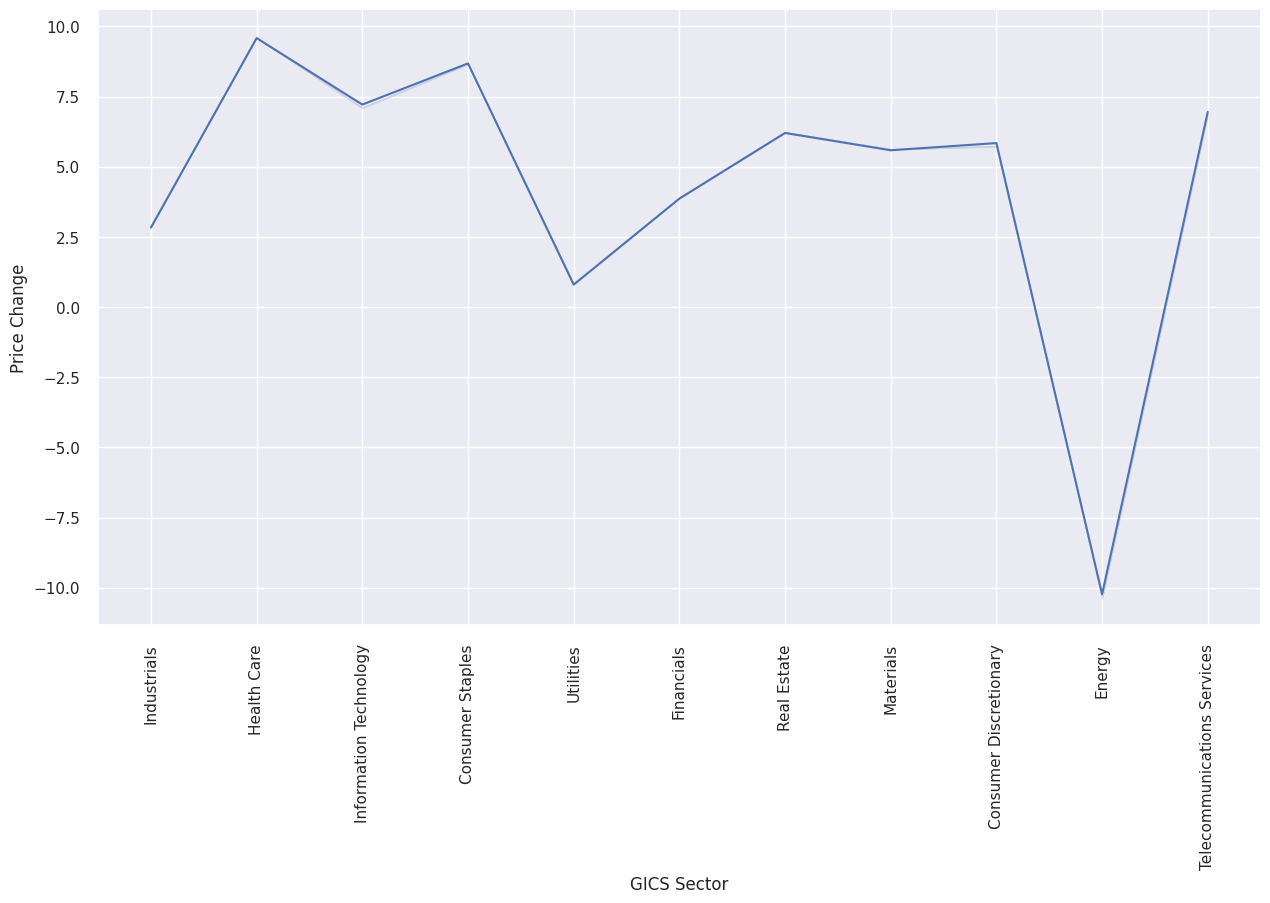

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df, x='GICS Sector', y='Price Change', ci=False)
plt.xticks(rotation=90)
plt.show()

Data appears varied

Health Care has the highest price change (percentage) increase at around 9.0 followed by Consumer Staples at around 8.5. Energy has a very notable negative price decrease, way into the negatives at around -10.0.

**GICS Sector and Cash Ratio**

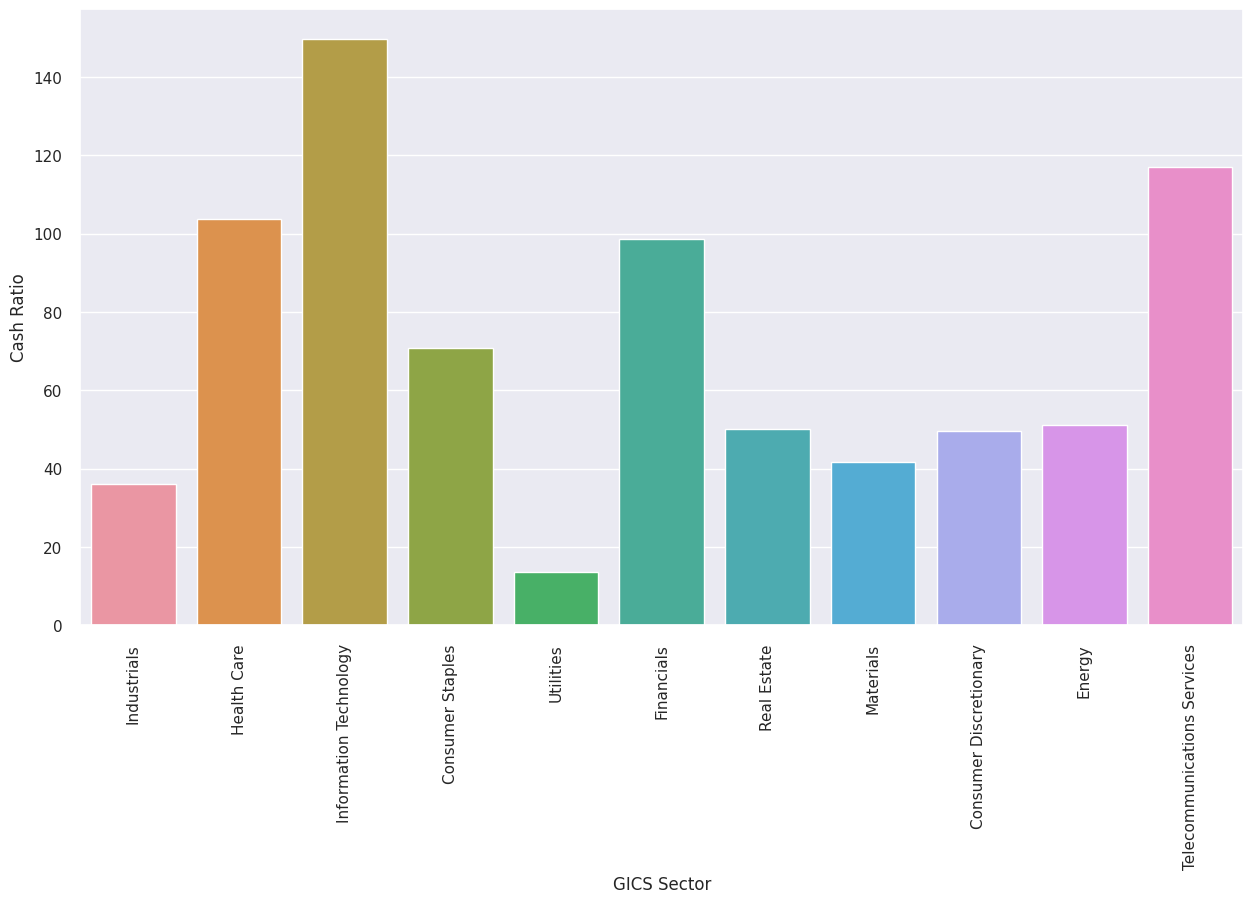

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Cash Ratio', ci=False)
plt.xticks(rotation=90)
plt.show()

Information Technology has the highest cash ratio at around 150 followed by Telecommunication Services at around 115. Utilities is the lowest at around 10. 

**GICS Sector and P/E Ratio**

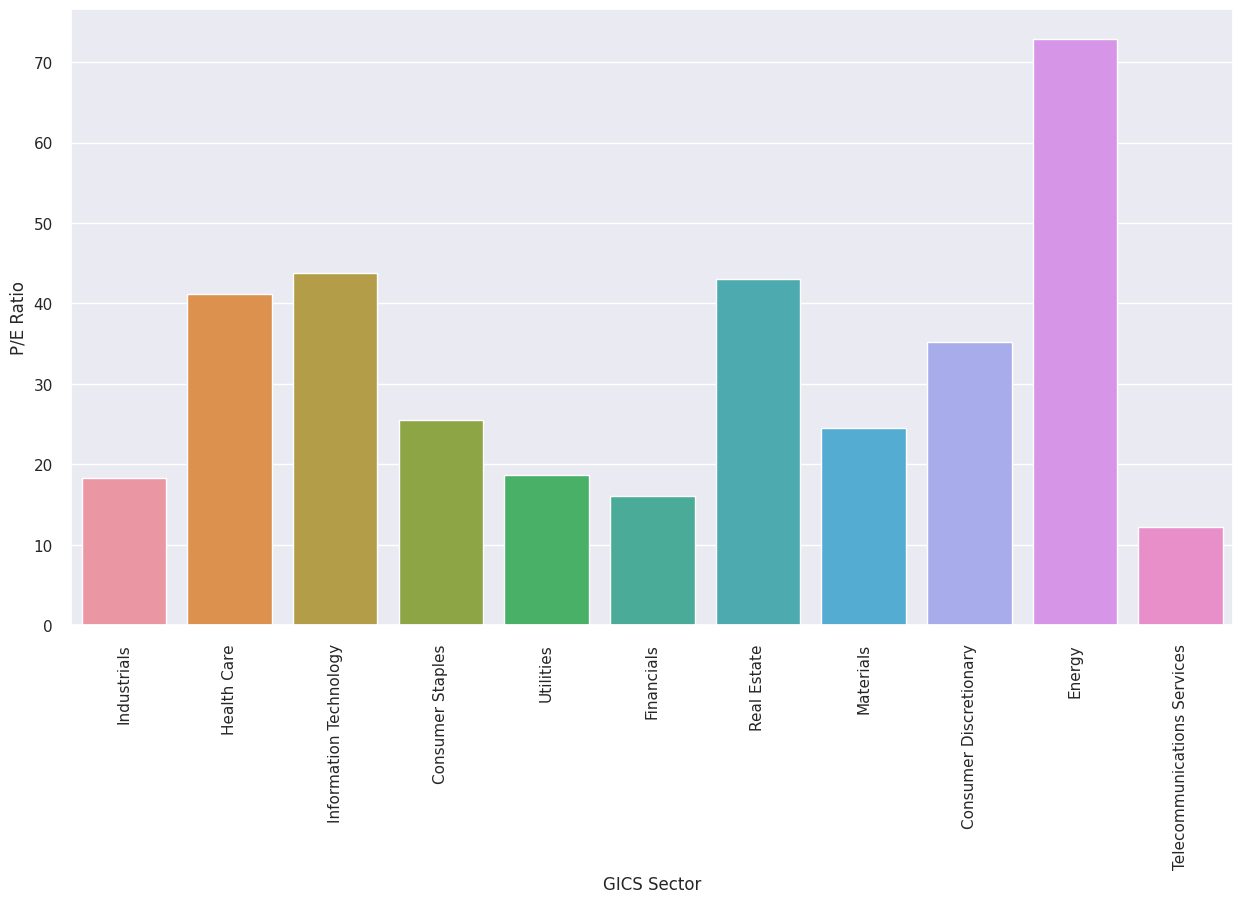

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='P/E Ratio', ci=False)
plt.xticks(rotation=90)
plt.show()

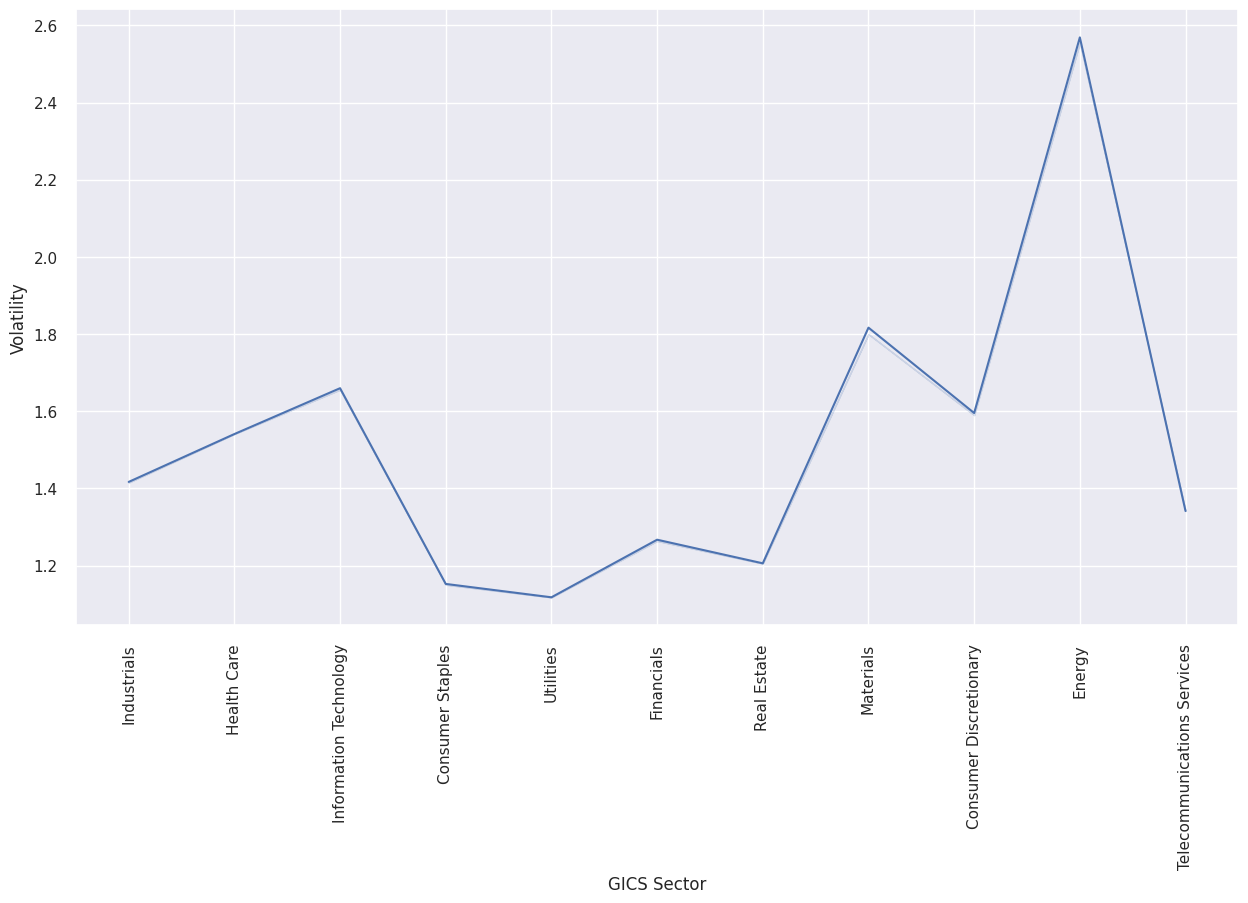

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df, x='GICS Sector', y='Volatility', ci=False)
plt.xticks(rotation=90)
plt.show()

Data appears varied

Energy has the highest P/E Ratio at around 75. Telecommunications Services is the lowest at around 12. 

**GICS Sector and Volatility**

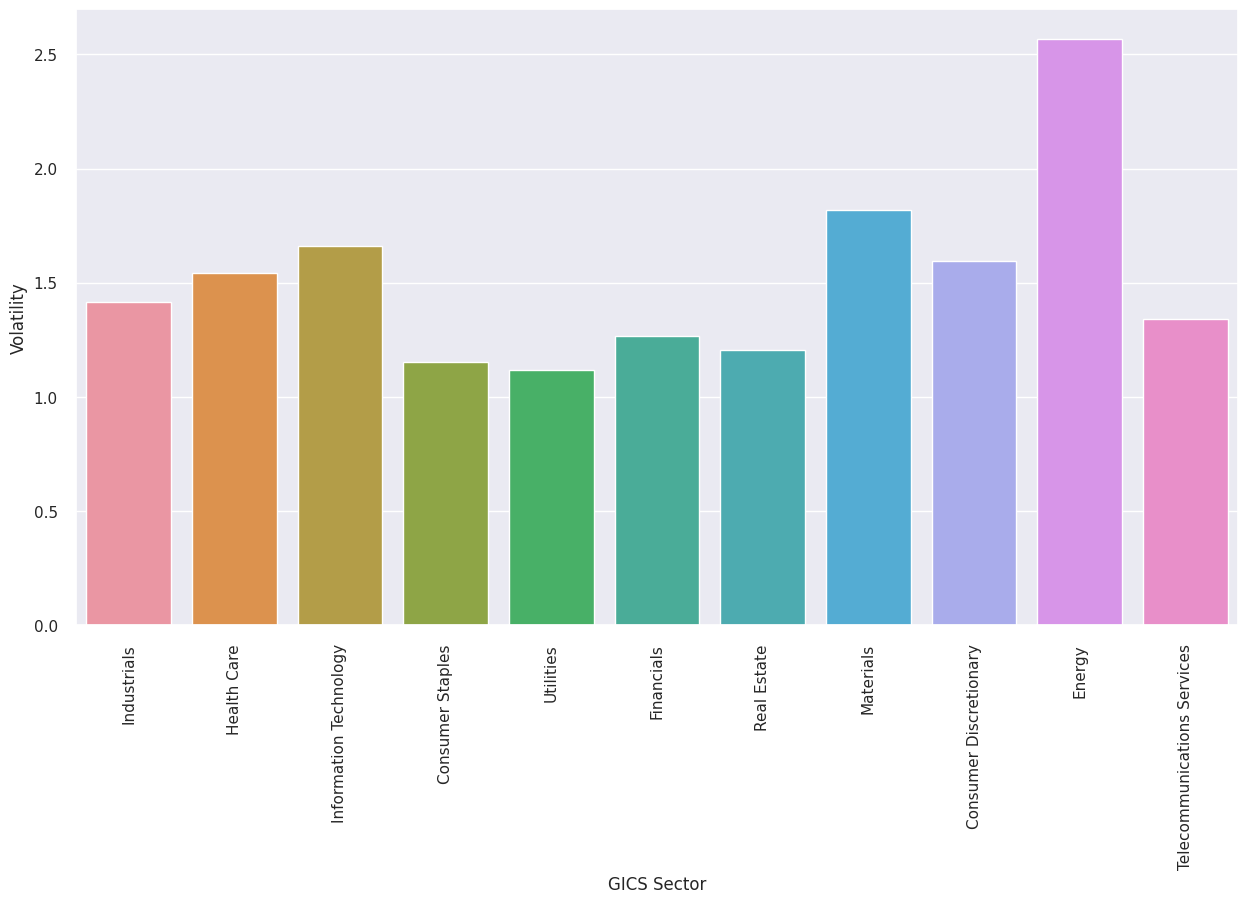

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Volatility', ci=False)
plt.xticks(rotation=90)
plt.show()

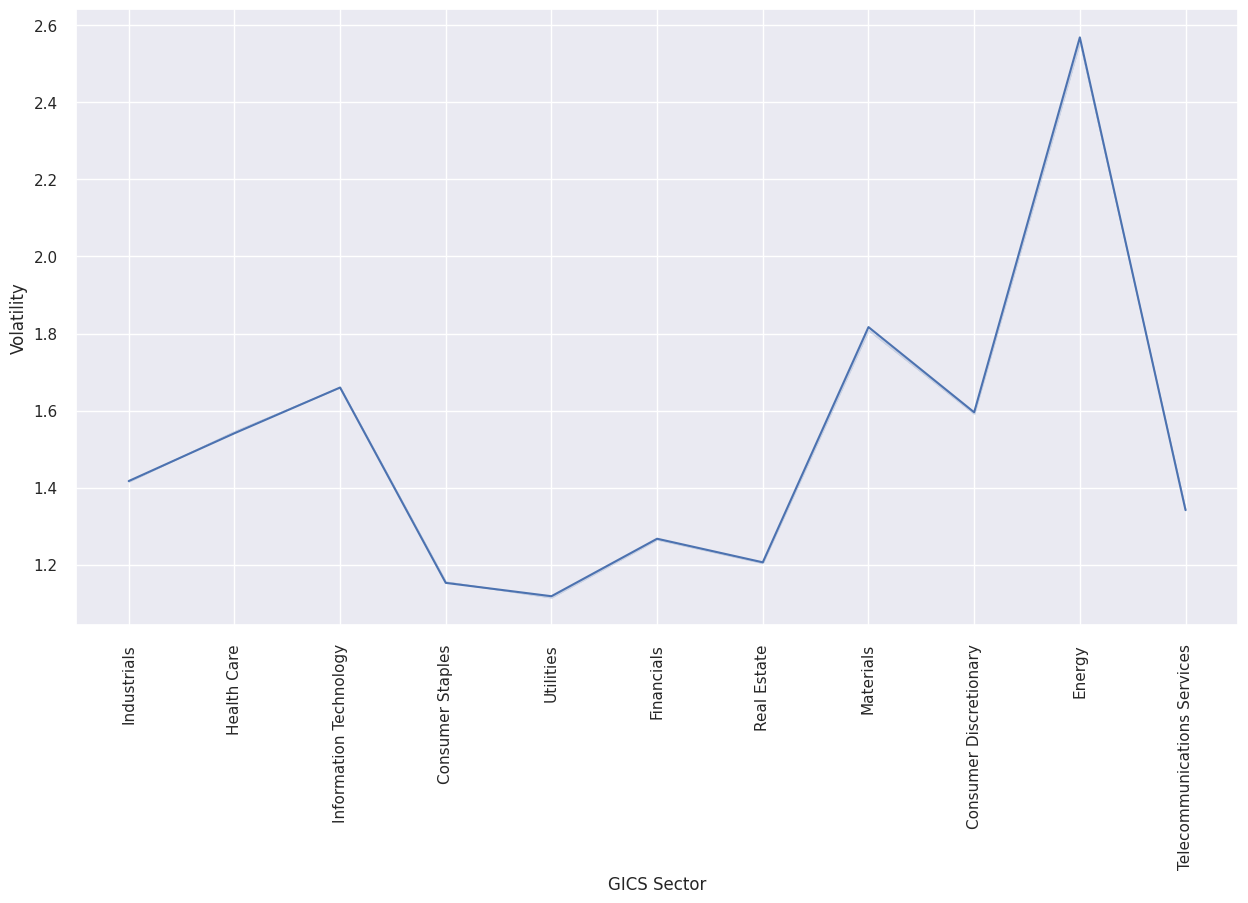

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df, x='GICS Sector', y='Volatility', ci=False)
plt.xticks(rotation=90)
plt.show()

Data appears varied. 

Energy has the highest volatility at a bit over 2.5. Utilities is the lowest at around 1.2. 

**Answering Questions**:

1. What does the distribution of stock prices look like?

* The distribution of stock prices is right-skewed. The mean stock price is $80.86, greater than the median value showed on the graph (the mean is green and the median is shown in the black line). When mean is greater than median, it indicates right-skewed data (also known as a positive skew). It is also worth noting that extreme values tend to affect the mean more than the median.  


2. The stocks of which economic sector have seen the maximum price increase on average?

* Health Care has the highest price change (percentage) increase at around 9.0 followed by Consumer Staples at around 8.5. Energy has a very notable negative price decrease, way into the negatives at around -10.0.


3. How are the different variables correlated with each other?

* Estimated Shares Outstanding appears to have a positive correlation with Net Income at 0.59, which makes sense. Earning Per Share and Net Income also have a positive correlation at 0.56. Earning Per Share and Current Price also have a somewhat positive correlation at 0.48. 

* There are some negative somewhat weak correlations as well--namely Earnings Per Share Outstanding and ROE at -0.41 along with Volatility and Price Change at -0.41 as well. Other than these features, there is not a lot of notable correlations.


4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?

* The data appears varied. 


* Information Technology has the highest cash ratio at around 150 followed by Telecommunication Services at around 115. Utilities is the lowest at around 10. 


5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

* The data appears varied. 

* Energy has the highest P/E Ratio at around 75. Telecommunications Services is the lowest at around 12. 

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

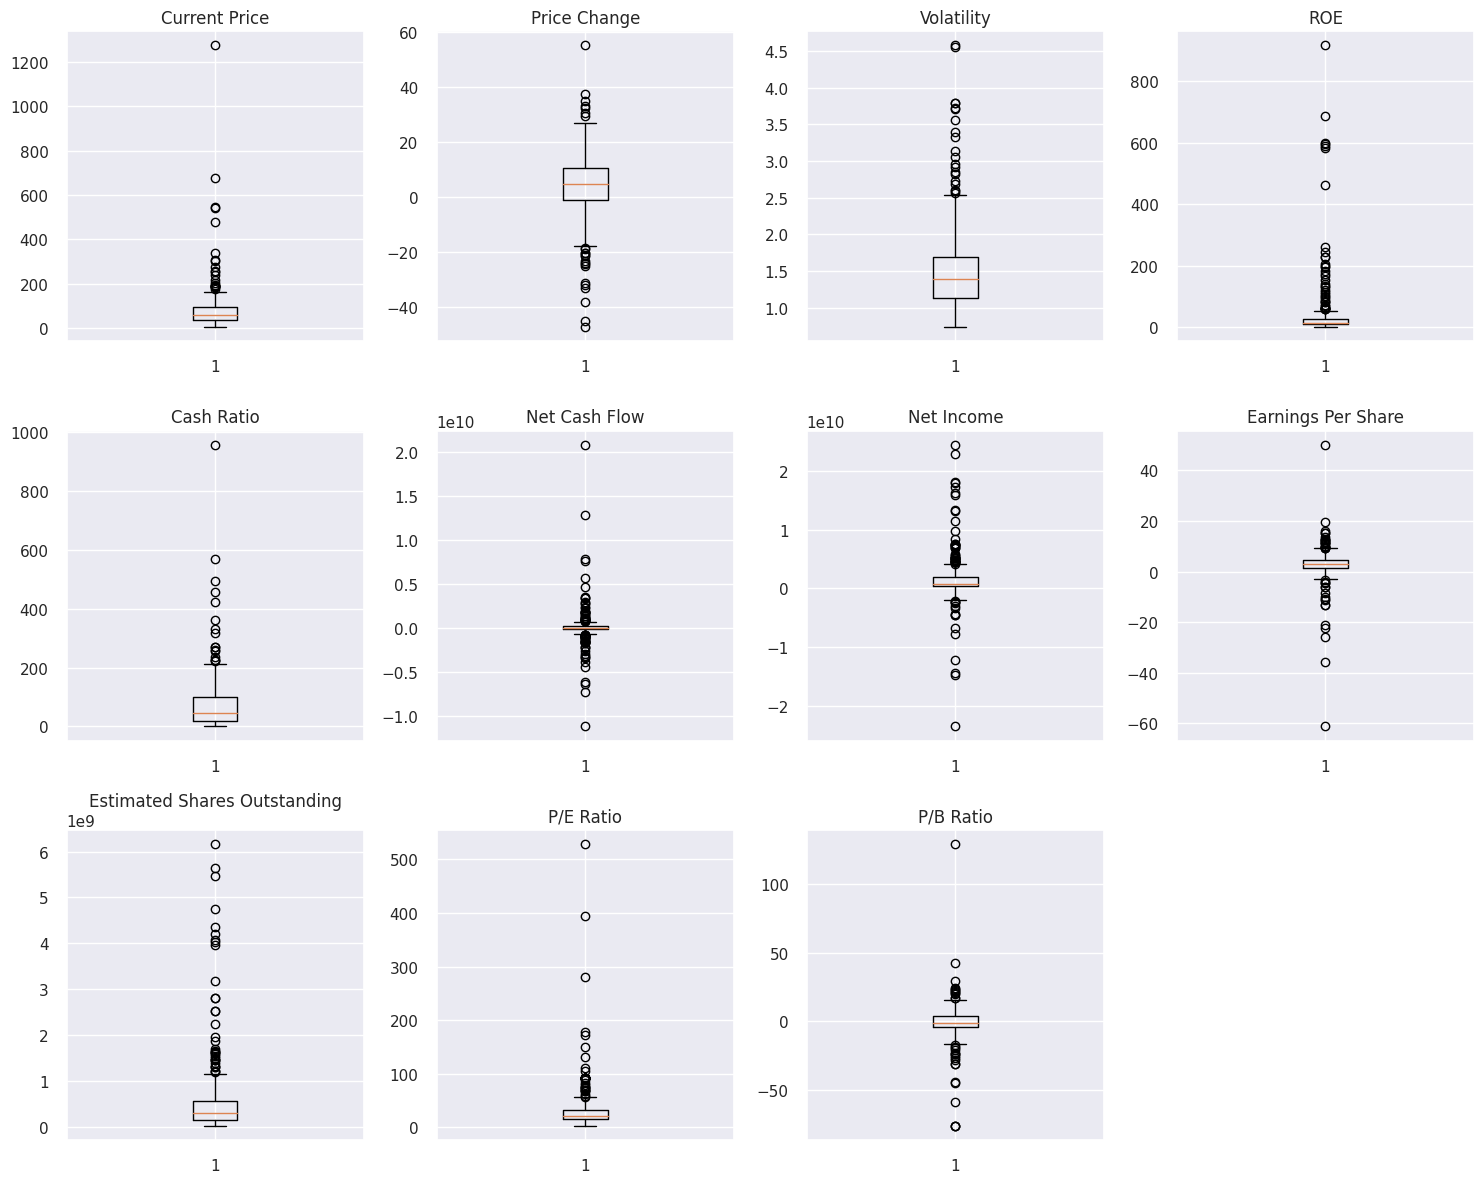

In [ ]:
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Scaling**

In [ ]:
# variables used for clustering
numeric_columns

['Current Price',
 'Price Change',
 'Volatility',
 'ROE',
 'Cash Ratio',
 'Net Cash Flow',
 'Net Income',
 'Earnings Per Share',
 'Estimated Shares Outstanding',
 'P/E Ratio',
 'P/B Ratio']

In [ ]:
# scaling the data before clustering
scaler = StandardScaler()
subset = df[numeric_columns].copy()
subset_scaled = scaler.fit_transform(subset)

In [ ]:
# creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

## EDA

- It is a good idea to explore the data once again after manipulating it.

## K-means Clustering

In [ ]:
k_means_df = subset_scaled_df.copy()

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.1745559827866363
Number of Clusters: 5 	Average Distortion: 2.128799332840716
Number of Clusters: 6 	Average Distortion: 2.080400099226289
Number of Clusters: 7 	Average Distortion: 2.0289794220177395
Number of Clusters: 8 	Average Distortion: 1.964144163389972
Number of Clusters: 9 	Average Distortion: 1.9221492045198068
Number of Clusters: 10 	Average Distortion: 1.8513913649973124
Number of Clusters: 11 	Average Distortion: 1.8024134734578485
Number of Clusters: 12 	Average Distortion: 1.7900931879652673
Number of Clusters: 13 	Average Distortion: 1.7417609203336912
Number of Clusters: 14 	Average Distortion: 1.673559857259703


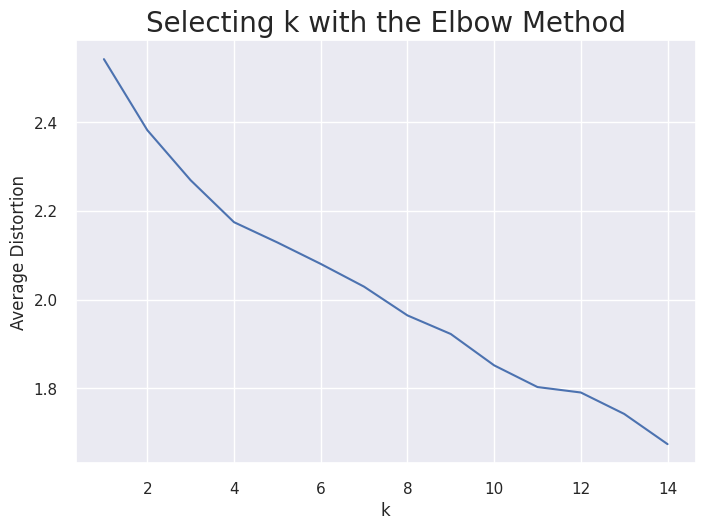

In [ ]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

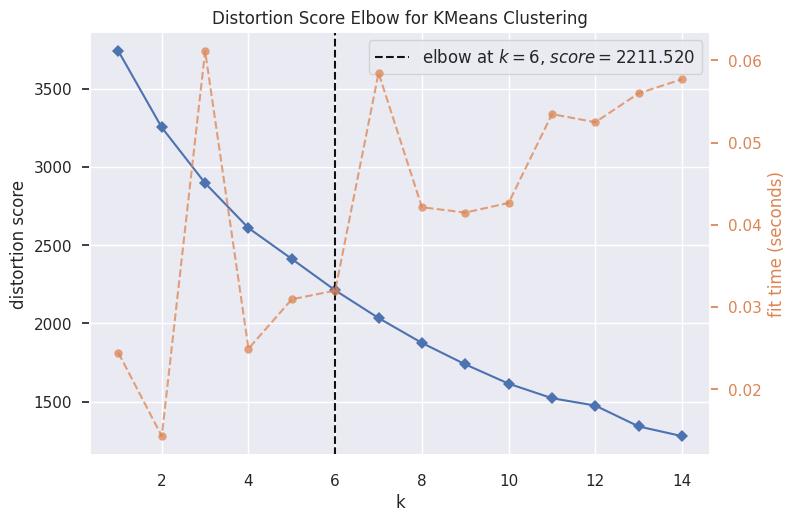

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

K seems to be 6.

**Silhouette Scores**

For n_clusters = 2, the silhouette score is 0.43969639509980457)
For n_clusters = 3, the silhouette score is 0.4644405674779404)
For n_clusters = 4, the silhouette score is 0.4577225970476733)
For n_clusters = 5, the silhouette score is 0.43228336443659804)
For n_clusters = 6, the silhouette score is 0.4005422737213617)
For n_clusters = 7, the silhouette score is 0.3976335364987305)
For n_clusters = 8, the silhouette score is 0.40278401969450467)
For n_clusters = 9, the silhouette score is 0.3778585981433699)
For n_clusters = 10, the silhouette score is 0.13458938329968687)
For n_clusters = 11, the silhouette score is 0.1421832155528444)
For n_clusters = 12, the silhouette score is 0.2044669621527429)
For n_clusters = 13, the silhouette score is 0.23424874810104204)
For n_clusters = 14, the silhouette score is 0.12102526472829901)


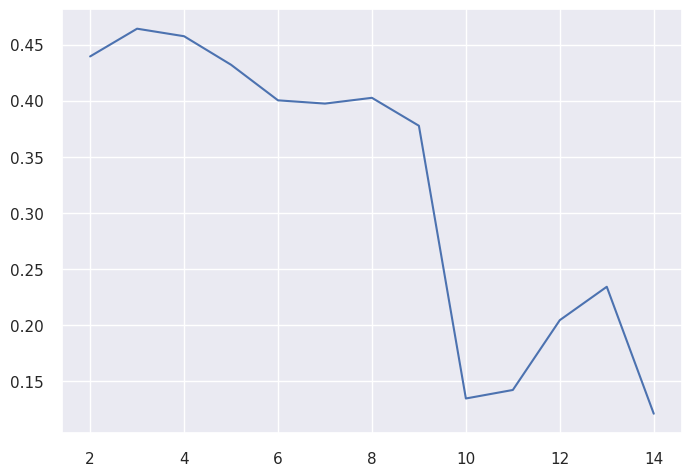

In [ ]:
sil_score = []
cluster_list = range(2, 15)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

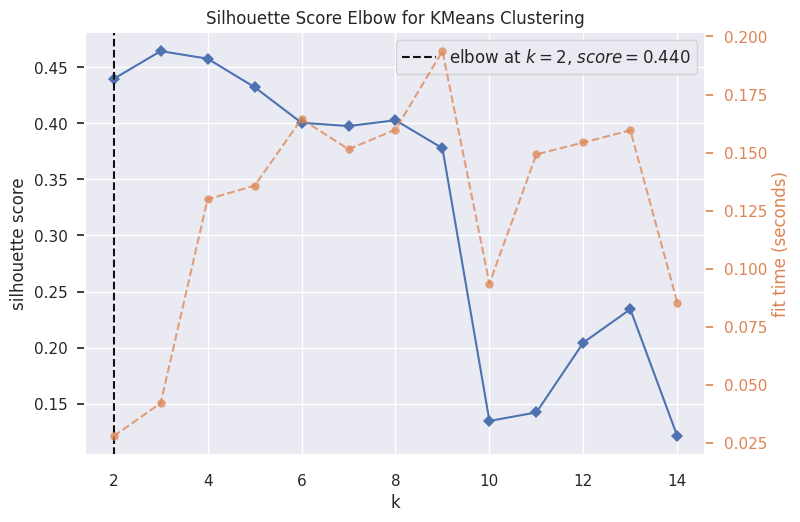

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

3 seems to be the optimal K score according to this visualization and the silhouette score at 0.46444

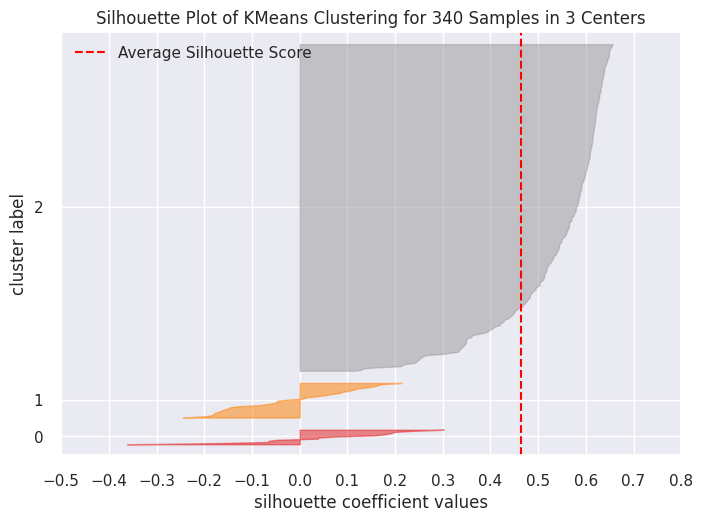

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

Uh-oh, getting negative values with K at 3 

Let's try some other values for K, maybe using the optimal elbow method at 6.

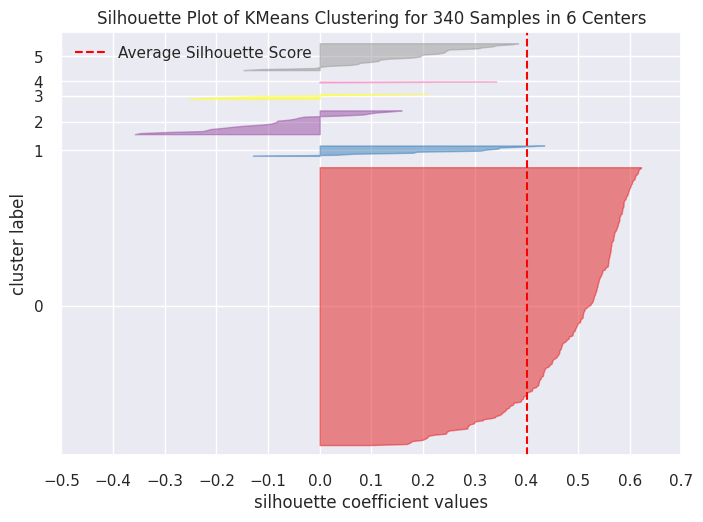

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

Getting even more negative values.

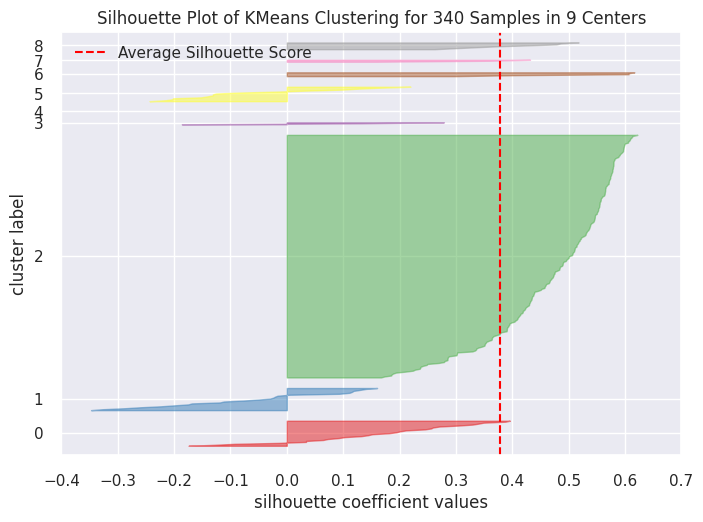

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 9 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(9, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

A little better. Let's try 10...

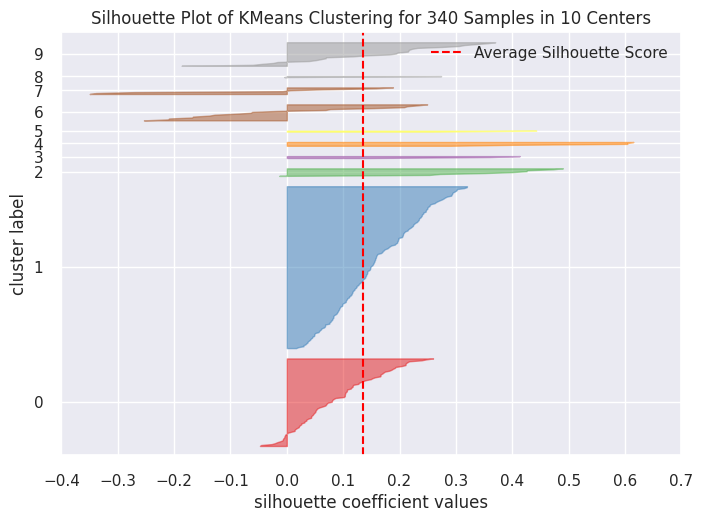

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 10 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(10, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

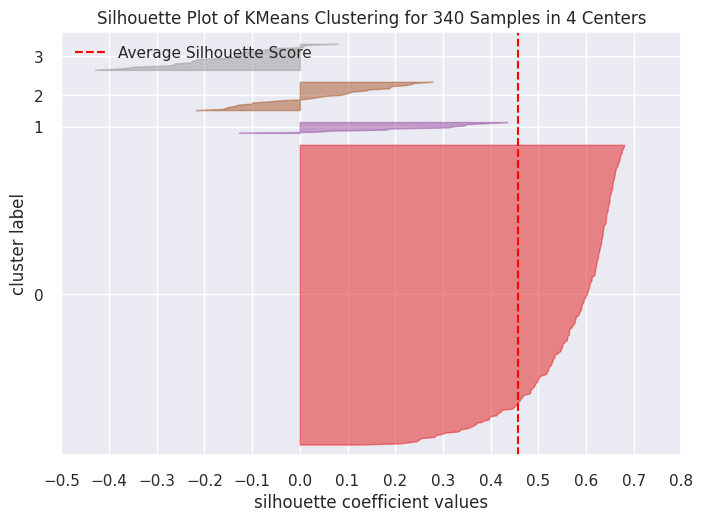

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

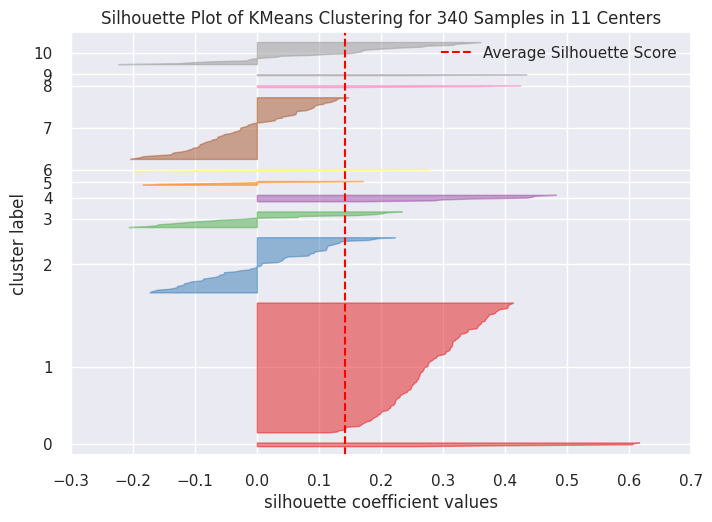

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 11 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(11, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

I tried a lot of these and got negative values for multiple attempts.

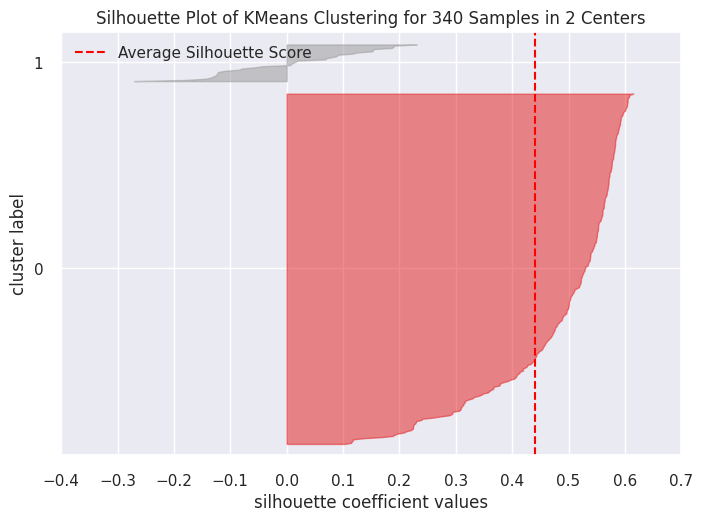

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(2, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

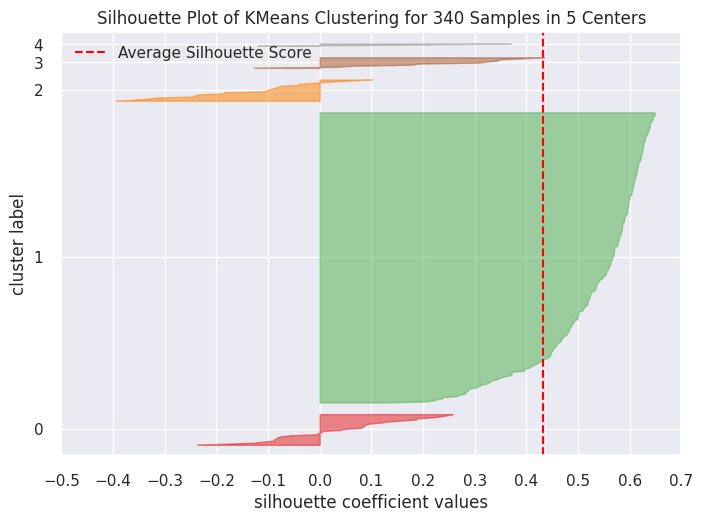

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

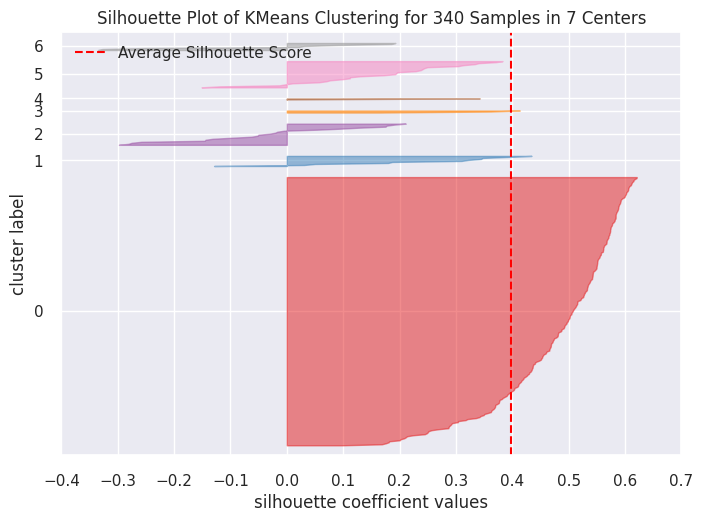

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(7, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

7 is actually looking pretty good. 

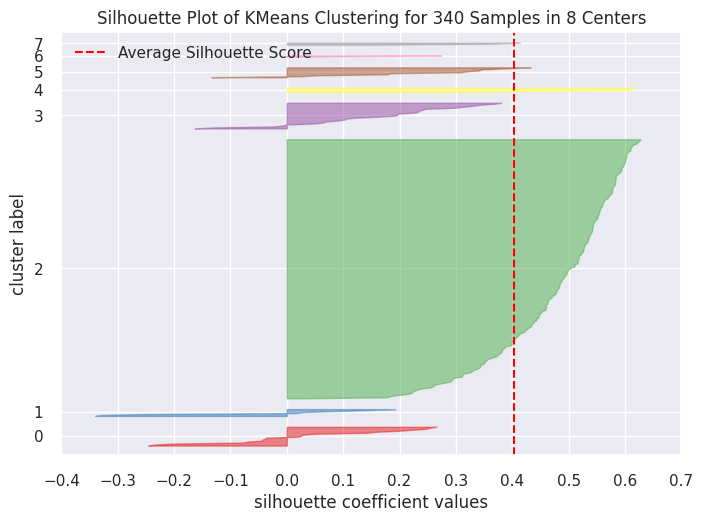

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(8, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

3 has the best silhouette score, but 3 might not be enough and pretty disproportionate with some negative values for other clusters--5 also has some negative values but a decent silhouette score. 2 also has some disproportionate negative values. 

After that, 6, 7, and 8 have the highest avg silhouette coefficient values at or above 0.4 with most cluster values not in the negatives. 

However, **I will go with 8 clusters** as the coefficient values are mostly positive. Also, in the Silhoutte Score for Elbow K Means Clustering graph, there is still a notable peak at 8. 

Moreover, with 340 rows in the dataset pertaining to stock features, it makes sense to have more clusters--stock industries and more have variety as we've seen in the EDA section. If the dataset were say 26 rows, there is likelihood based on the industry, that 8 might be too much, but for this instance, it seems appropriate.  

**Creating Final Model**

In [ ]:
# final K-means model
kmeans = KMeans(n_clusters=8, random_state=1) #using 8 clusters
kmeans.fit(k_means_df)

KMeans(random_state=1)

In [ ]:
# creating a copy of the original data
df1 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["KM_segments"] = kmeans.labels_
df1["KM_segments"] = kmeans.labels_

**Cluster Profiling**

In [ ]:
km_cluster_profile = df1.groupby("KM_segments").mean()

In [ ]:
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("KM_segments")["Security"].count().values
)

In [ ]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

In [ ]:
## Complete the code to print the companies in each cluster
for cl in df1["KM_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df1[df1["KM_segments"] == cl]["Security"].unique())
    print()

In cluster 2, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Archer-Daniels-Midland Co' 'Ameren Corp' 'American Electric Power'
 'AFLAC Inc' 'American International Group, Inc.'
 'Apartment Investment & Mgmt' 'Assurant Inc' 'Arthur J. Gallagher & Co.'
 'Akamai Technologies Inc' 'Albemarle Corp' 'Alaska Air Group Inc'
 'Allstate Corp' 'Applied Materials Inc' 'AMETEK Inc'
 'Affiliated Managers Group Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Amphenol Corp' 'Activision Blizzard' 'AvalonBay Communities, Inc.'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Bank of America Corp' 'Baxter International Inc.' 'BB&T Corporation'
 'Bard (C.R.) Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpillar Inc.' 'Chubb Limited' 'CBRE Group'
 'Crown Castle International Corp.' 'Carnival 

In [ ]:
df1.groupby(["KM_segments", "GICS Sector"])['Security'].count()

KM_segments  GICS Sector                
0            Consumer Discretionary          3
             Consumer Staples                1
             Energy                          1
             Health Care                     5
             Information Technology          8
             Materials                       1
             Telecommunications Services     1
1            Consumer Discretionary          2
             Health Care                     4
             Information Technology          1
             Real Estate                     1
2            Consumer Discretionary         32
             Consumer Staples               15
             Energy                          5
             Financials                     45
             Health Care                    28
             Industrials                    50
             Information Technology         20
             Materials                      17
             Real Estate                    26
             Teleco

Cluster 2 seems to have the highest counts, generally speaking. 

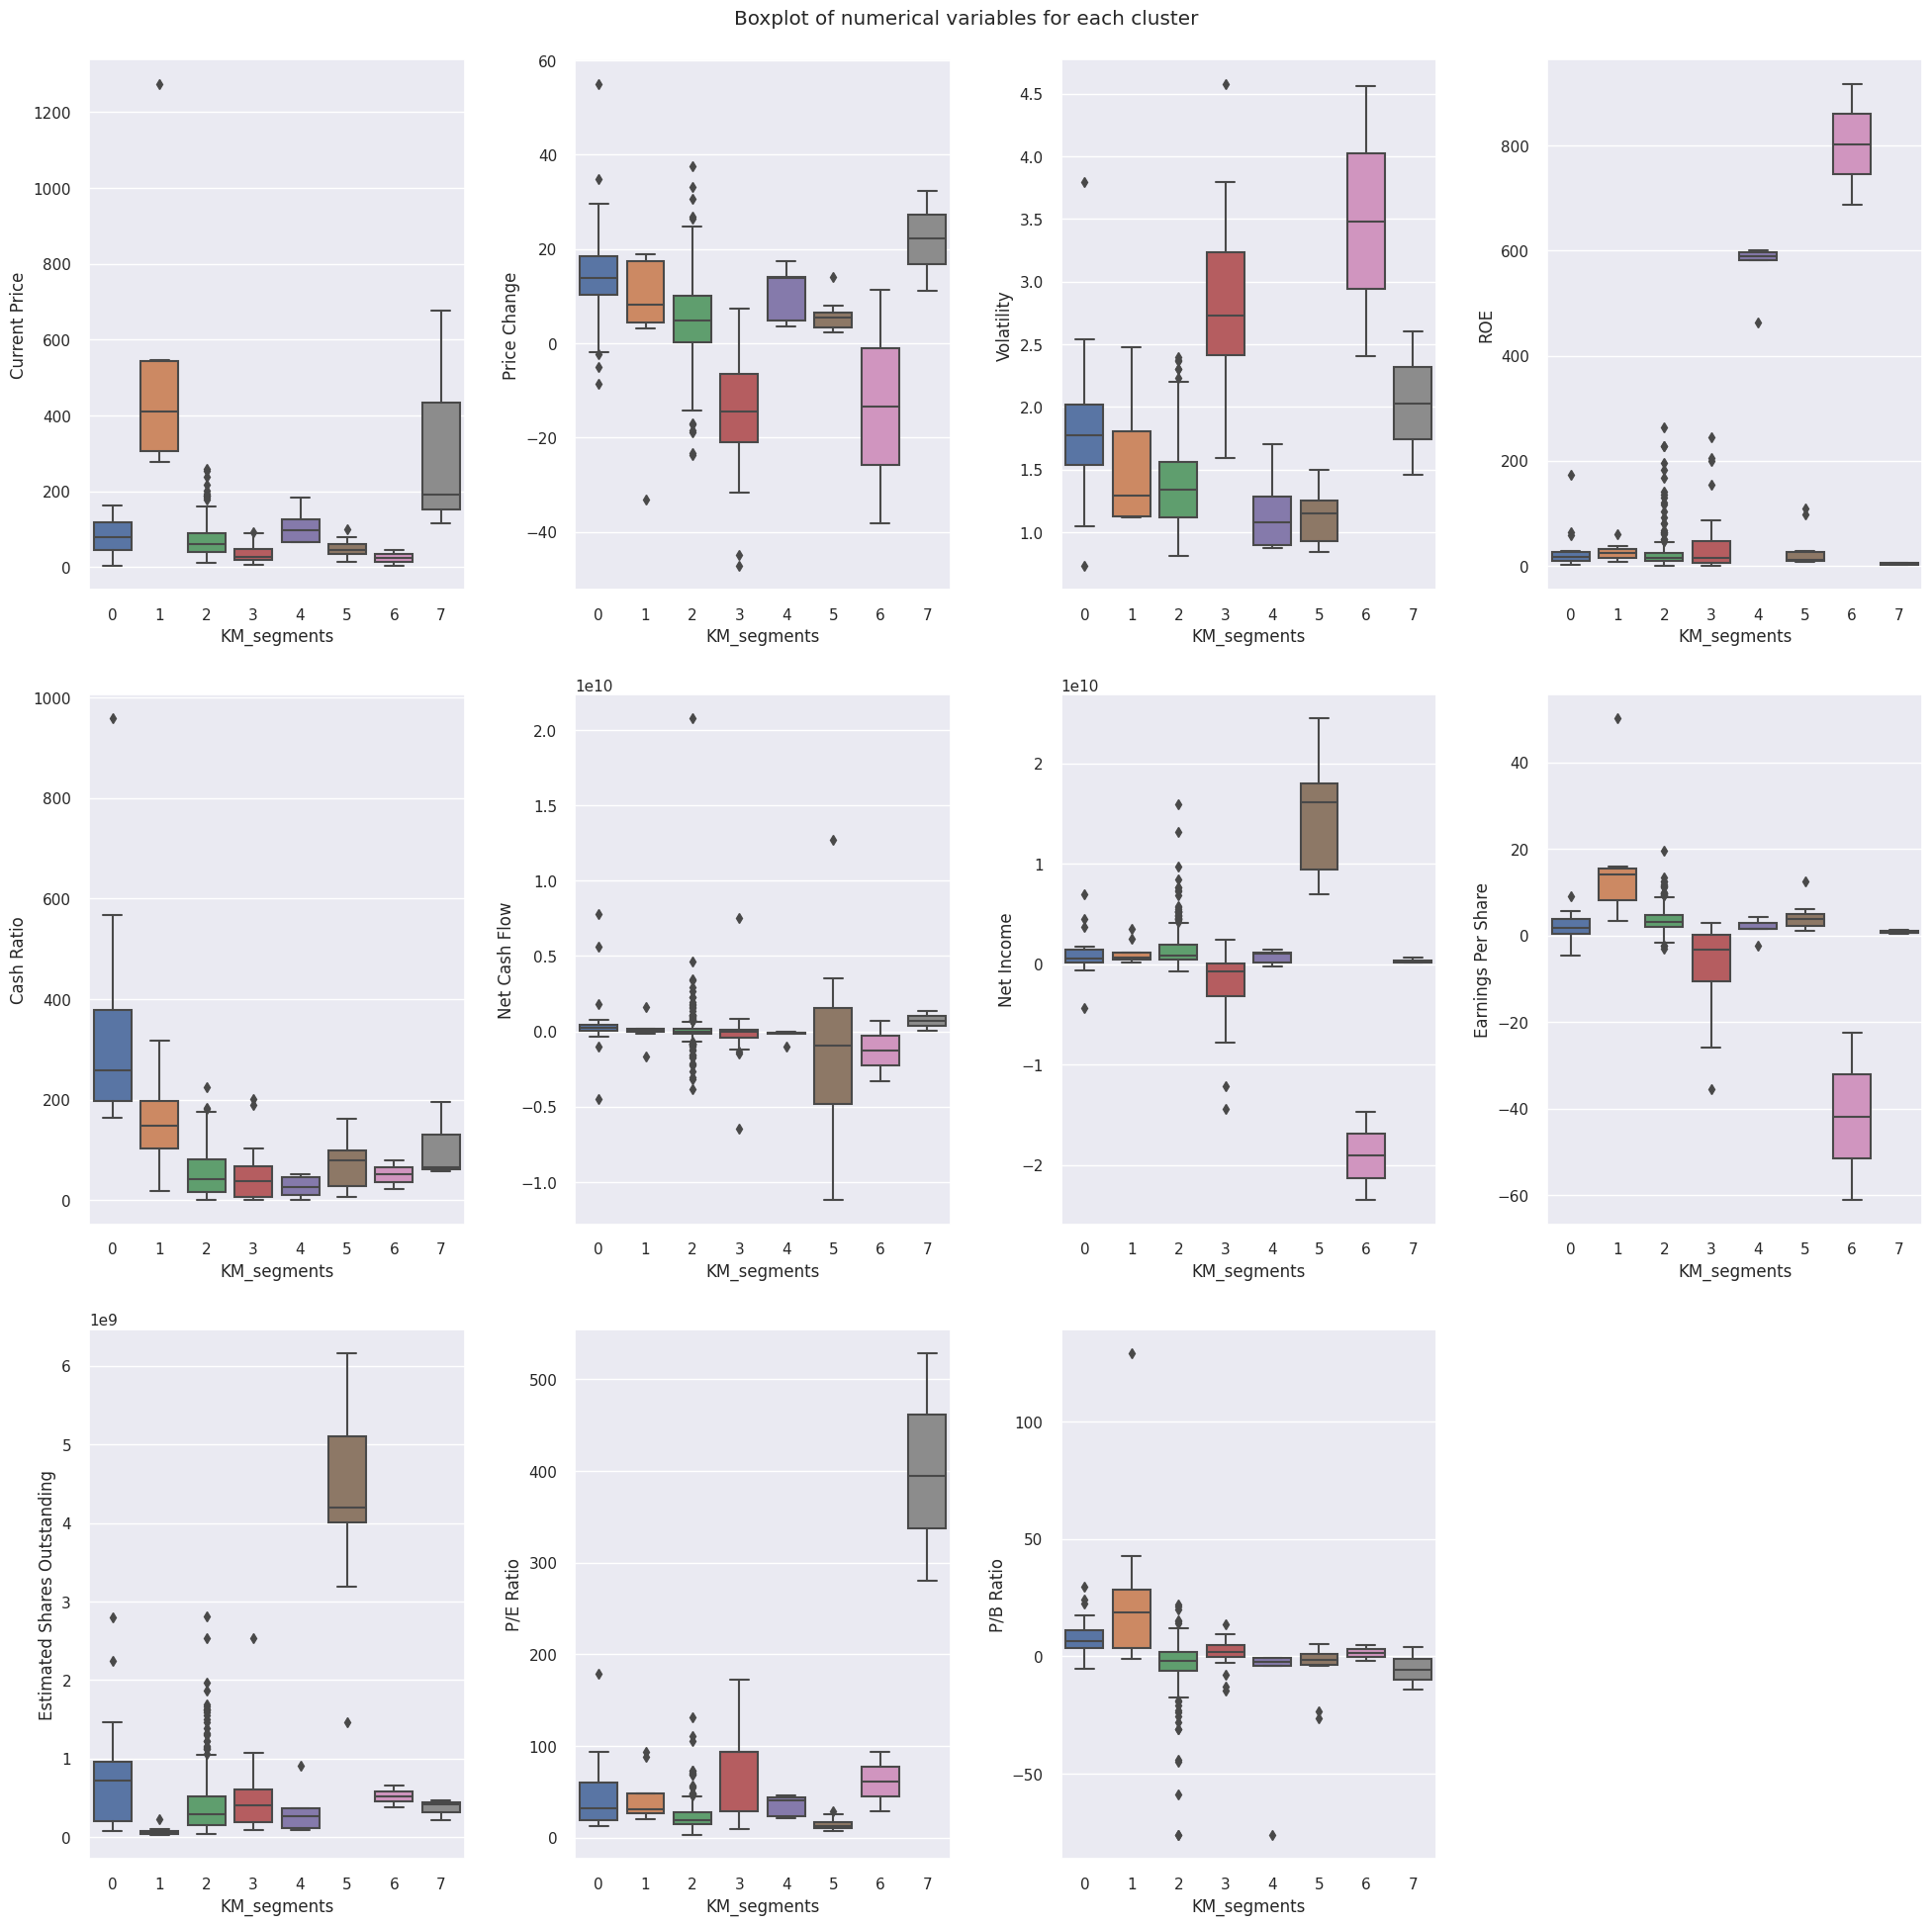

In [ ]:
#Viewing as boxplot 
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df1, x="KM_segments", y=variable)

plt.tight_layout(pad=2.0)

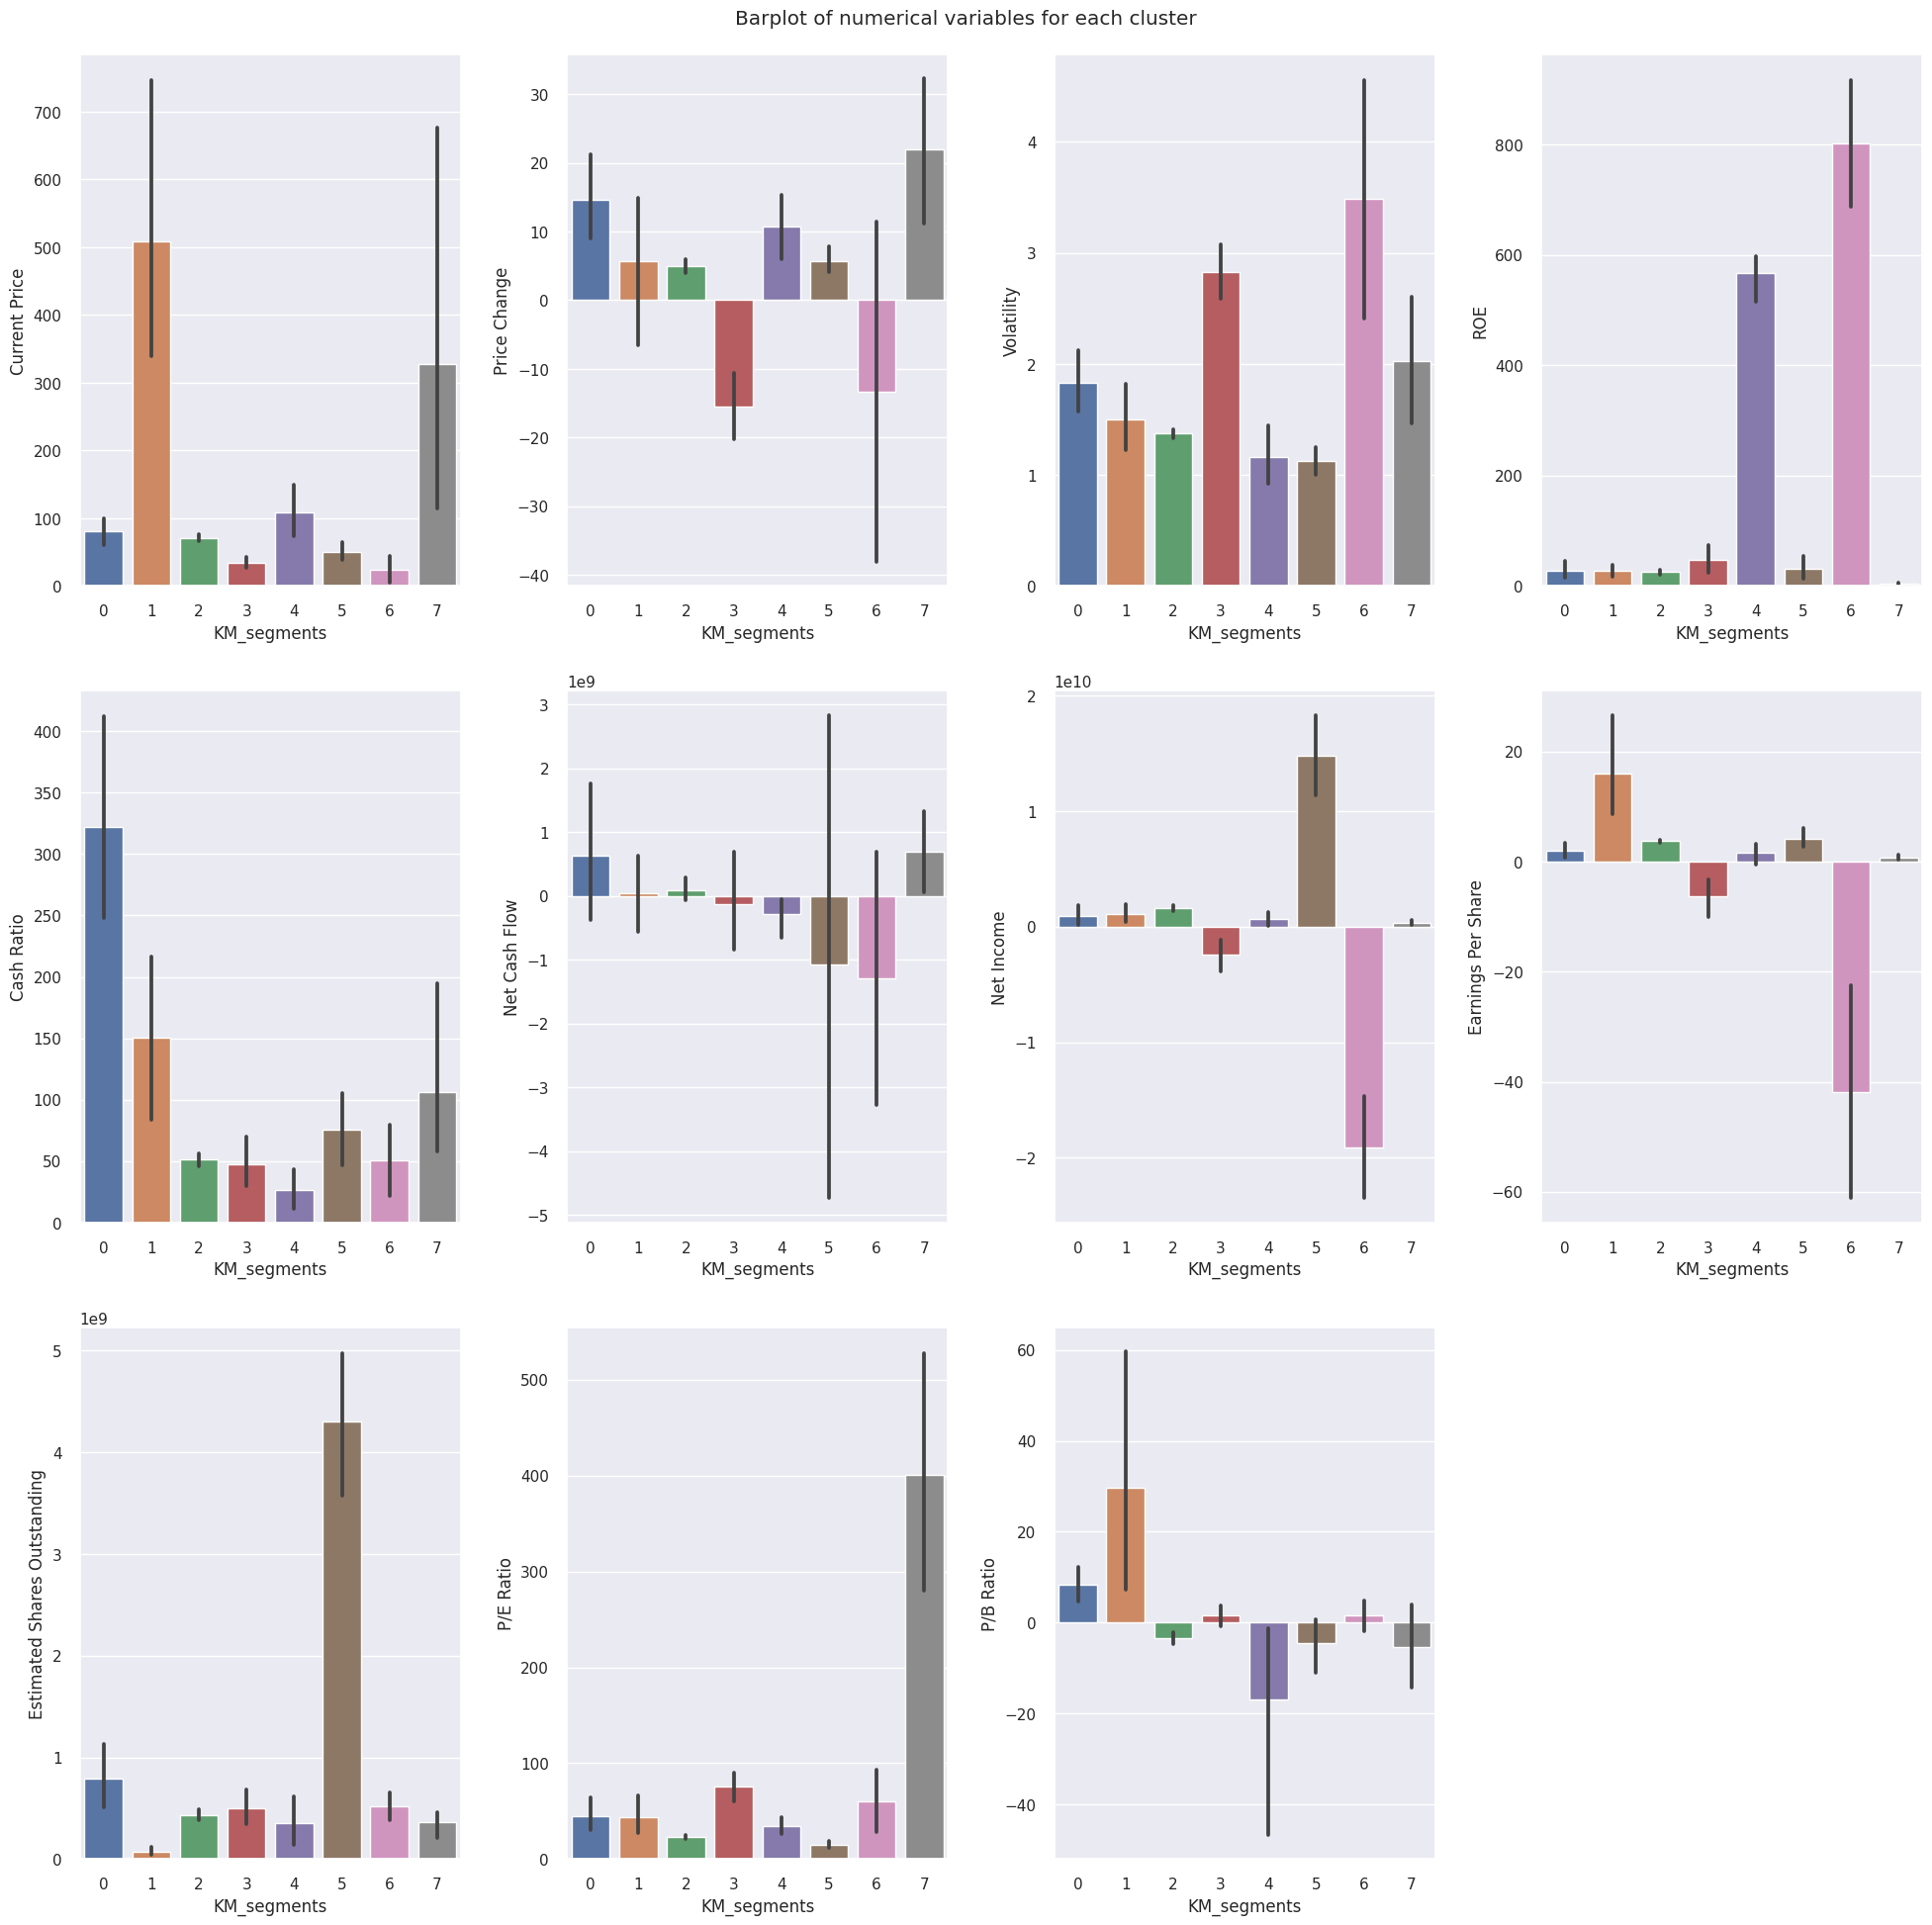

In [ ]:
#Viewing as barplot
plt.figure(figsize=(20, 20))
plt.suptitle("Barplot of numerical variables for each cluster")

# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.barplot(data=df1, x="KM_segments", y=variable)

plt.tight_layout(pad=2.0)

##**K-Means Clustering Interpretation**

# **Cluster 0 Interpretation:**

**Current Price:** This cluster contains pretty average currently priced stocks as compared with the other clusters, with an average current price of approximately $80.15.

**Price Change:** However, in terms of Price Change it is at a higher average on the chart at around positive 14.57. In other words, the stock prices of this cluster tend to go up at the 13 week mark. 

**Volatility:** In terms of Volatility, it ranks an average 1.83, which compared to the other clusters is a little on the higher side, but not by much, so there isn't a ton of variance. These stocks in Cluster 0 are more stable. 

**ROE:**
Return on investment isn't great--as a select few other clusters like 7 and 4, but tends to be pretty average as compared to others at 28.10.

**Cash Ratio:**
In terms of Cash Ratio, this cluster ranks the top at around: 321.85--significantly higher than the other clusters. Very significant per industry stadards. 

**Net Cash Flow:**
Net Cash Flow for Cluster 0 is the second highest at 625929050, but not by a lot.  

**Net Income:**
Net income is 942050500; positive, but still not monumentus in terms of difference compared with other-like clusters. Not super high or super low as compared to other clusters. 
 
**Earnings Per Share:**
Average Earnings Per Share is around 2.01 for Cluster 0, which is positive and pretty average compared to other clusters. Although an optimal number would be around 80. 

**Estimated Shares Outstanding:**
For Estimated Shares outstanding, Cluster 0 is at the second highest at around 790456335.27, but still significantly under Cluster 5. In most cases, the value of each share is inversely related to the number of shares outstanding.   

**P/E Ratio:**
P/E Ratio for Cluster 0 is pretty average/low-mid level compared to others and very similar to Cluster 1 at around 45.07. However, an ideal P/E Ratio is around 20-25 (and sometimes 30), so this feature could indicate that this cluster has overzealous growth potential and could be overvalued.   

**P/B Ratio:**
When compared to other Clusters, Cluster 0 has a positive P/B ratio and is at the second highest at an average at about 8.31, although still decently further from the highest value seen in Cluster 1. Yet, Cluster 0's market price price to book ratio is high for the industry standard; paired with a low/average return on investment, perhaps Cluster 0 could be comprised of overvalued stocks.   

# **Cluster 1 Interpretation:**

**Current Price:** This cluster has the highest stock price as compared to other clusters by a long shot at an average of around $508.53. 

**Price Change:** Price change is at an average of around 5.73, indicating not a ton of price change in 13 weeks, but it is still positive. 	

**Volatility:** In terms of Volatility, it ranks an average of around 1.50, which is low/average compared to others but not by much, so there isn't a ton of variance.

**ROE:**
Return on investment isn't great--as a select few other clusters like 7 and 4, but tends to be pretty average as compared to others at 27.25.

**Cash Ratio:**
In terms of Cash Ratio, this cluster ranks the second highest at 150.88, still far behind Cluster 0. However, this is still good. A ratio less than 1 can indicate financial problems and inability to pay debts (although it depends on the scenario--sometimes an overly inflated cash ratio isn't good). Still very notable for industry standards.

**Net Cash Flow:**
Net Cash Flow for Cluster 1 is pretty neutral compared to other clusters at 37895875.00.

**Net Income:**
Net income is 1116994125.000000; positive, but still not monumentus in terms of difference compared with other-like clusters.

**Earnings Per Share:**
Average Earnings Per Share is around 15.97 for Cluster 1, the highest of all the clusters by a lot. Although an optimal number would be around 80. 

**Estimated Shares Outstanding:**
For Estimated Shares outstanding, Cluster 1 is by far the lowest at an average of around 75654420.94. Shareholders could be concentrated, i.e. the company has a lot of closely-held shares. In most cases, the value of each share is inversely related to the number of shares outstanding.   

**P/E Ratio:**
Average P/E Ratio for Cluster 1 is 43.73, very similiar to Cluster 0. However, an ideal P/E Ratio is around 20-25 (and sometimes 30), so this feature could indicate that this cluster has overzealous growth potential and could be overvalued.    

**P/B Ratio:**
When compared to other clusters, Cluster 1 has the highest average P/B ratio by far at around 29.59. Yet, Cluster 1's market price price to book ratio is very high for the industry standard; paired with a low/average return on investment, perhaps Cluster 1 could be comprised of overvalued stocks. However, the P/B ratio alone is very high, which can be a good indicator.    


# **Cluster 2 Interpretation:**

**Current Price:** This cluster has a decently low/average stock price at around $71.10 when compared to other clusters. 

**Price Change:** Price change is at around an average of 4.97, indicating not a ton of price change in 13 weeks, but it is still positive. 	

**Volatility:** In terms of Volatility, it ranks an average of around 1.37, which is low/average compared to others but not by much, so there isn't a ton of variance.

**ROE:**
Return on investment isn't great--as a select few other clusters like 7 and 4, but tends to be pretty average as compared to others at around 24.99. 

**Cash Ratio:**
In terms of Cash Ratio, this cluster is fairly low/average compared to other clusters at an average of 51.09. However, this is still good. A ratio less than 1 can indicate financial problems and inability to pay debts (although it depends on the scenario--sometimes an overly inflated cash ratio isn't good). 

**Net Cash Flow:**
Net Cash Flow for Cluster 2 is pretty neutral, yet on the positive side of things as compared to other clusters at an average of about 87930727.27.

**Net Income:**
Net income is an average of around 1579775988.64; positive, but still not monumentus in terms of difference compared with other-like clusters.

**Earnings Per Share:**
Average Earnings Per Share is lower/average as compared to other clusters, yet still positive at around an average of 3.69. Although an optimal number would be around 80. 

**Estimated Shares Outstanding:**
For Estimated Shares outstanding, Cluster 2 is on the lower side, but pretty average as compared to like-clusters within this feature at an average of 435677482.32; there could be some diluting. In most cases, the value of each share is inversely related to the number of shares outstanding.  

**P/E Ratio:**
Average P/E Ratio for Cluster 2 is at the second lowest at around an averagae of 23.23. An ideal P/E Ratio is around 20-25 (and sometimes 30), so this this is good.  

**P/B Ratio:**
The average P/B ratio of Cluster 2 is slightly negative at -3.350613: these clusters likely have more total liabilities than assets.	   

# **Cluster 3 Interpretation:**

**Current Price:** This cluster has the second lowest price as compared with other clusters at an average of around $34.23. 

**Price Change:** Price change is the most significantly negative as compared with other clusters at an average of around -15.52. 

**Volatility:** In terms of Volatility, it ranks second highest at an average of around 2.83; compared to others there is variance. 

**ROE:**
Return on investment isn't great--but still slightly higher than Cluster 0, Cluster 1, Cluster 2, and Cluster 5. The average value for Cluster 3's ROE is around 48.04. 

**Cash Ratio:**
In terms of Cash Ratio, Cluster 3 is slightly behind Cluster 2 at an average of about 47.74; In terms of Cash Ratio, this cluster is fairly low/average compared to other clusters. 

**Net Cash Flow:**
Net Cash Flow for Cluster 3 is the fourth most negative, but not by a lot at an average of around -128651518.518519. Could be a sign of poor financial health (but on the lesser side as compared to others). 

**Net Income:**
Net income is negative, but not by a lot at an average of around -2444318518.52--a sign of poor financial health. Cluster 6 is more in the hole comparatively though.  

**Earnings Per Share:**
It makes sense that due to the negative values from Net income and net cash flow that earnings per share is also negative at an average of around -6.284444; the second most negative of the clusters for this feature. 

**Estimated Shares Outstanding:**
For Estimated Shares outstanding, Cluster 3 is on the lower side, but pretty average as compared to like-clusters within this feature at an average of 503031539.06; there could be some diluting. In most cases, the value of each share is inversely related to the number of shares outstanding. 

**P/E Ratio:**
Average P/E Ratio for Cluster 3 is the second highest, although very much still behind Cluster 7 at an average of around 75.63. An ideal P/E Ratio is around 20-25 (and sometimes 30). This feature could indicate that this cluster has a very much overzealous growth potential and could be overvalued.    

**P/B Ratio:**
The average P/B ratio of Cluster 3 is at around an average of 1.66, of which is better than being under 1. Usually 1.0-3.0 is a good P/B ratio. 

# **Cluster 4 Interpretation:**

**Current Price:** This cluster has the third highest stock price compared to others at an average of around $108.30; still far behind Cluster 1 and Cluster 7. 

**Price Change:** Price change is the is pretty average/a bit above average compared to other clusters at around an average of 10.74.	

**Volatility:** In terms of Volatility, there's not a ton of variance and the value is similar to Cluster 5 at an average of around 1.17--this cluster is more stable. 

**ROE:**
Return on investment is great compared to other clusters and is the second highest of all the clusters at an average of around 566.20, which is notable also given the price.  

**Cash Ratio:**
In terms of Cash Ratio, Cluster 4 has the lowest cash ratio at an average of 26.60 compared to others, but still this is a good ratio. A ratio less than 1 can indicate financial problems and inability to pay debts (although it depends on the scenario--sometimes an overly inflated cash ratio isn't good). 

**Net Cash Flow:**
Net Cash Flow for Cluster 4 is the third most negative, at an average of -278760000.00. Could be a sign of poor financial health. 

**Net Income:**
Net income is positive, not by a lot, but pretty average/low average as compared to other clusters that are similar at an average value of 687180000.00.  

**Earnings Per Share:**
Earnings per share is at an average of around 1.54 for Cluster 4. Pretty close to Cluster 0; compared to all clusters though this is pretty low. An optimal number would be around 80 per industry standard.  	

**Estimated Shares Outstanding:**
For Estimated Shares outstanding, Cluster 4 is second to lowest, but still pretty average as compared to like-clusters within this feature at an average of 349607057.72; there could be some diluting. 

**P/E Ratio:**
Average P/E Ratio for Cluster 4 is an average of around 34.90. However, an ideal P/E Ratio is around 20-25 (and sometimes 30), so this feature could indicate that this cluster could be overvalued. 

**P/B Ratio:**
The average P/B ratio of Cluster 4 the most negative by far at an average value of around -16.85. A very negative P/B value indicates that the stocks in this cluster are undervalued or have fundamental problems that need further investigation. 

# **Cluster 5 Interpretation:**

**Current Price:** This cluster contains a little bit higher than average currently priced stocks as compared with the other clusters, with an average current price of approximately $50.52. 

**Price Change:** Price change is very similar to Cluster 1. Price change is at an average of around 5.75, indicating not a ton of price change in 13 weeks, but it is still positive. 

**Volatility:** In terms of Volatility, there's not a ton of variance and the value is similar to Cluster 4 at an average of around 1.13--this cluster is very stable. 

**ROE:**
Return on investment isn't great--as a select few other clusters like 7 and 4, but tends to be pretty average as compared to others at around 31.09. 

**Cash Ratio:**
In terms of Cash Ratio, Cluster 5 is fairly average compared to other clusters at an average of around 75.90. However, this is still good. A ratio less than 1 can indicate financial problems and inability to pay debts (although it depends on the scenario--sometimes an overly inflated cash ratio isn't good). 

**Net Cash Flow:**
Net Cash Flow for Cluster 5 is the second most negative (Cluster 6 is the most negative, but not by a lot). The Net Cash Flow for Cluster 5 is at an average of around -1072272727.27. Could be a significant sign of poor financial health. For this feature of Cluster 5, it is also a notable that there is a large range in this data. 

**Net Income:**
Net income is the highest by far of any other cluster at an average of around 14833090909.09, of which is very notable. Maybe credit is being used? Needs further investigation. 

**Earnings Per Share:**
Earnings per share is pretty close to Cluster 2. Average Earnings Per Share is lower/average as compared to other clusters, yet still positive at around an average of 4.15. Although an optimal number would be around 80. 	

**Estimated Shares Outstanding:**
For Estimated Shares outstanding, Cluster 5 overwhelmingly the highest at 4298826628.727273	compared to other clusters; there could be some concentrating--needs further investigation. In most cases, the value of each share is inversely related to the number of shares outstanding. 

**P/E Ratio:**
Average P/E Ratio for Cluster 5 is the lowest of the clusters at an average of around 14.80. However, an ideal P/E Ratio is around 20-25 (and sometimes 30), so this feature could indicate that this cluster could be undervalued. 

**P/B Ratio:**
The average P/B ratio of Cluster 5 negative at an average value of around -4.55. The stocks in this cluster may be undervalued or have fundamental problems that need further investigation. 

# **Cluster 6 Interpretation:**

**Current Price:** This cluster contains the lowest current stock price compared to the other clusters at an average of around $24.49. 

**Price Change:** In Cluster 6, price change is the second most negative (it is also worth noting there is a notably large range of data). The price change for this Cluster is an average at around -13.32. In other words, the price tends to go down at the 13 week mark.   

**Volatility:** In terms of Volatility, Cluster 6 is at the highest of all the clusters at an average at around 3.48. (It is also worth noting there is a notably large range of data). This cluster of stocks can be considered quite unstable--but with high risk, there can be high reward, which brings us to the next feature of ROE. 

**ROE:**
Return on investment is the highest by far of all of the clusters at an average of 802.00--again high risk, high reward potential, but there can be risks. (Also worth noting, the boxplot/distribution is very near normal). 

**Cash Ratio:**
In terms of Cash Ratio, Cluster 6 is fairly average/low average compared to other clusters, namely Cluster 2 and 3 at an average of 51.00. However, this is still good. A ratio less than 1 can indicate financial problems and inability to pay debts (although it depends on the scenario--sometimes an overly inflated cash ratio isn't good). 

**Net Cash Flow:**
Net Cash Flow for Cluster 6 is the most negative (but not by a lot, Cluster 5 is close). The Net Cash Flow for Cluster 6 is at an average of -1292500000.00. Could be a significant sign of poor financial health. For this feature of Cluster 6, it is also a notable that there is a large range in this data. 

**Net Income:**
Net income is the worst by far of the clusters and warrants further investigation, but makes sense as Net Cash Flow is negative. The Net Income for Cluster 6 is an average of -19106500000.00. 

**Earnings Per Share:**
Unsurprisingly, earnings per share is the most negative compared to the other clusters. Average Earnings Per Share for Cluster 6 is at an average of around -41.82. This warrants further investigation as the stocks are either losing money or the companies are spending more than they are earning. 	

**Estimated Shares Outstanding:**
For Estimated Shares outstanding, Cluster 6 is on the lower side, but pretty average as compared to like-clusters like Cluster 3 and 2. The estimated shares outstanding for Cluster 6 is an average of 519573983.250; there could be some diluting. In most cases, the value of each share is inversely related to the number of shares outstanding. 

**P/E Ratio:**
Average P/E Ratio for Cluster 6 is the third highest, although very much still behind Cluster 7 at an average of around 60.75. An ideal P/E Ratio is around 20-25 (and sometimes 30). This feature could indicate that this cluster has a very much overzealous growth potential and could be overvalued.  

**P/B Ratio:**
The average P/B ratio of Cluster 6 is very similar to Cluster 3 at around an average of around 1.57, of which is better than being under 1. Usually 1.0-3.0 is a good P/B ratio. 

# **Cluster 7 Interpretation:**

**Current Price:** Cluster 7 has the second highest average current price at around $327.01 per share.

**Price Change:** In Cluster 7, price change is the highest of all the clusters at an average of around 21.92. In other words, the price tends to go up at the 13 week mark.   

**Volatility:** In terms of Volatility, Cluster 7 has the third most value of the clusters at an average at around 2.03. This cluster of stocks can be considered unstable. 

**ROE:**
Return on investment is the highest by far the lowest of all of the clusters at an average of 4.00 (which is pretty far behind the other clusters). A lower ROE is not good. Higher would be better. 

**Cash Ratio:**
In terms of Cash Ratio, Cluster 7 is the third largest of the clusters at an average of 106.00, which is notable for industry standards. A ratio less than 1 can indicate financial problems and inability to pay debts (although it depends on the scenario--sometimes an overly inflated cash ratio isn't good). 

**Net Cash Flow:**
Net Cash Flow for Cluster 7 is the highest of all the clusters and a bit above Cluster 0 at an average of around 698240666.67, which can indicate good financial health. However, it is interesting to note net income (see below in next section).   

**Net Income:**
Interestingly enough, net income is the on the lower end of the positive clusters at an average of 287547000.00.  

**Earnings Per Share:**
Earnings per share is on the lower end of the positive clusters for this feature. Average Earnings Per Share for Cluster 7 is at an average of 0.75.	

**Estimated Shares Outstanding:**
For Estimated Shares outstanding, Cluster 7 is on the lower side, but pretty average as compared to like-clusters (not including Cluster 5, of which is overwhelmingly the highest). The estimated shares outstanding for Cluster 7 is an average of 366763235.30. In most cases, the value of each share is inversely related to the number of shares outstanding. 

**P/E Ratio:**
Average P/E Ratio for Cluster 7 is the highest by far of the clusters at an average of around 400.99. This for sure needs to be looked into, maybe it is incorrect? An ideal P/E Ratio is around 20-25 (and sometimes 30). This feature could indicate that this cluster has a very much overzealous growth potential and could be overvalued. Shared Price and Earnings Per Share are different ends of the spectrum. 

**P/B Ratio:**
The average P/B ratio of Cluster 7 is very similar to Cluster 6 and negative in nature at around an average of around -5.32. A negative P/B ratio can be thought of as not good depending on the situation. A negative P/B ratio can indicate more total liabilities than assests. Usually 1.0-3.0 is a good P/B ratio. 

##**Hierarchical Clustering**

**Computing Cophenetic Correlation**

In [ ]:
hc_df = subset_scaled_df.copy()

In [ ]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"] #distance metrics

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"] #linkages

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm
            
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.925919553052459.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correla

**Exploring different linkage methods with Euclidean distance only.**

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"] #linkages

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm
        
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.
****************************************************************************************************
Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


**Viewing the dendrograms for the different linkage methods with Euclidean distance.**

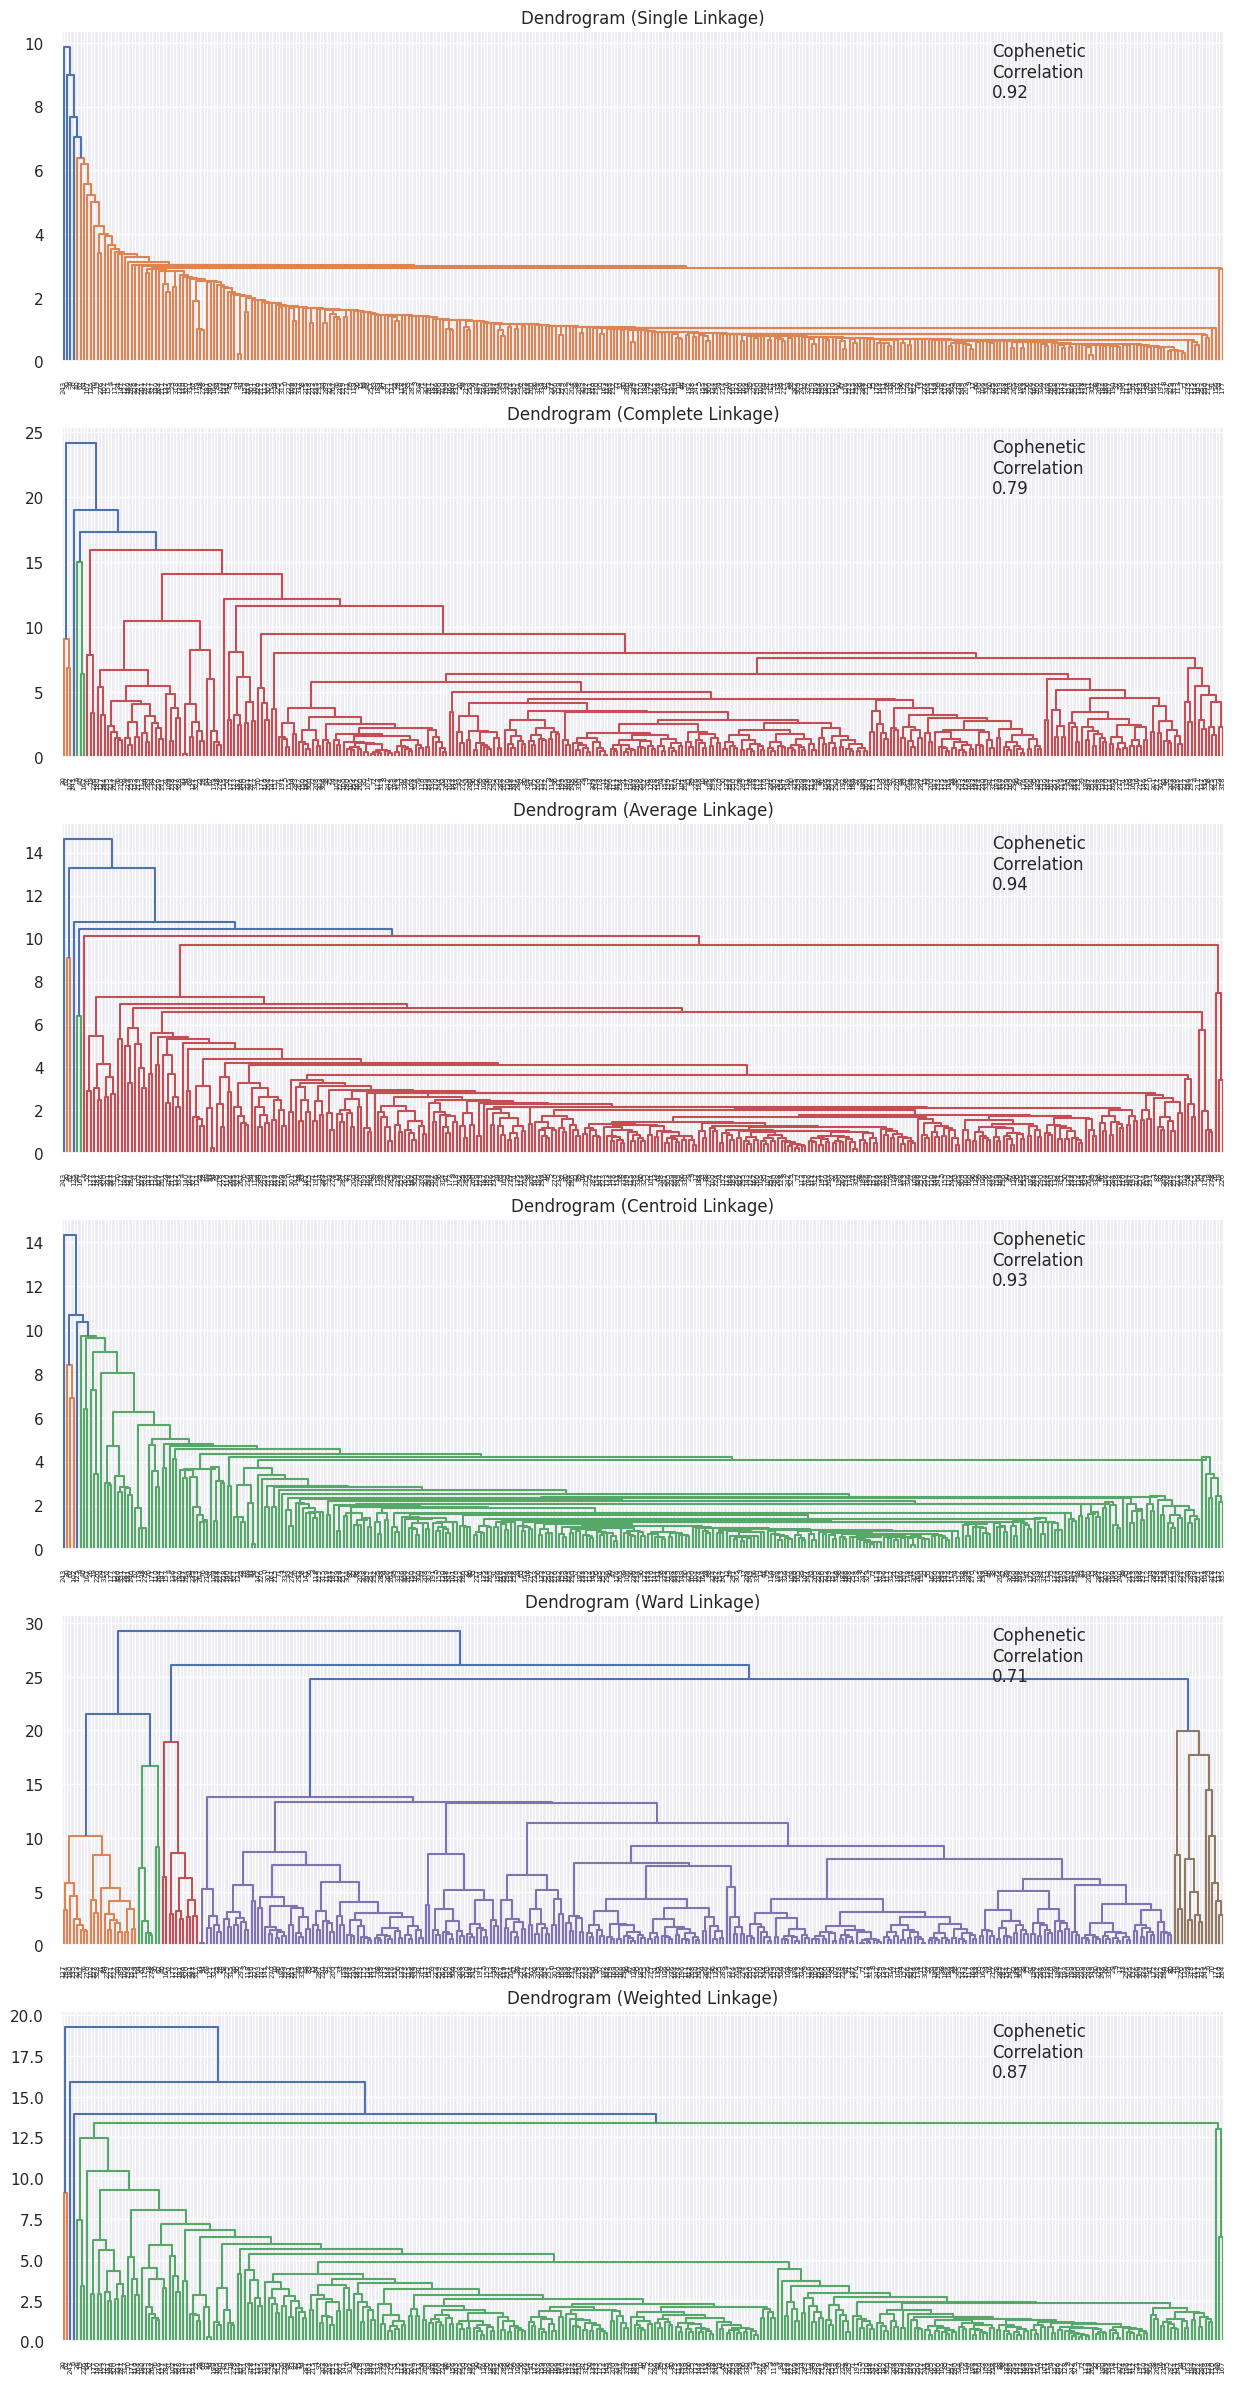

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"] #linkage methods

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

The cophenetic correlation is highest for average linkage. 

We will move ahead with average linkage.

I drew the line at around 9.5 to help in determining the amount of clusters.  

With the intersections at 9.5, it appears that there are **7 intersections--thus 7 clusters will be the appropriate number of clusters from the dendrogram for average linkage.**

**Creating Model using sklearn**

In [ ]:
HCmodel = AgglomerativeClustering(n_clusters=7, affinity="euclidean", linkage="average") 
HCmodel.fit(hc_df)

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=7)

In [ ]:
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

**Cluster Profiling**

In [ ]:
hc_cluster_profile = df2.groupby("HC_segments").mean() 
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Security"].count().values
)

In [ ]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

In [ ]:
## Complete the code to print the companies in each cluster
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 6, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Amgen Inc' 'Ameriprise Financial' 'American Tower Corp A'
 'AutoNation Inc' 'Anthem Inc.' 'Aon plc' 'Anadarko Petroleum Corp'
 'Amphenol Corp' 'Arconic Inc' 'Activision Blizzard'
 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'Baker Hughes Inc' 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.'
 'Ball Corp' 'Bristol-Myers Squibb' 'Boston Scient

Cluster 6 has a lot more stock data than the others.

In [ ]:
df2.groupby(["HC_segments", "GICS Sector"])['Security'].count()

HC_segments  GICS Sector                
0            Energy                          2
1            Financials                      1
             Information Technology          1
2            Consumer Discretionary          1
             Health Care                     1
             Information Technology          1
3            Information Technology          1
4            Consumer Discretionary          1
5            Information Technology          1
6            Consumer Discretionary         38
             Consumer Staples               19
             Energy                         28
             Financials                     48
             Health Care                    39
             Industrials                    53
             Information Technology         29
             Materials                      20
             Real Estate                    27
             Telecommunications Services     5
             Utilities                      24
Name: Security, dty

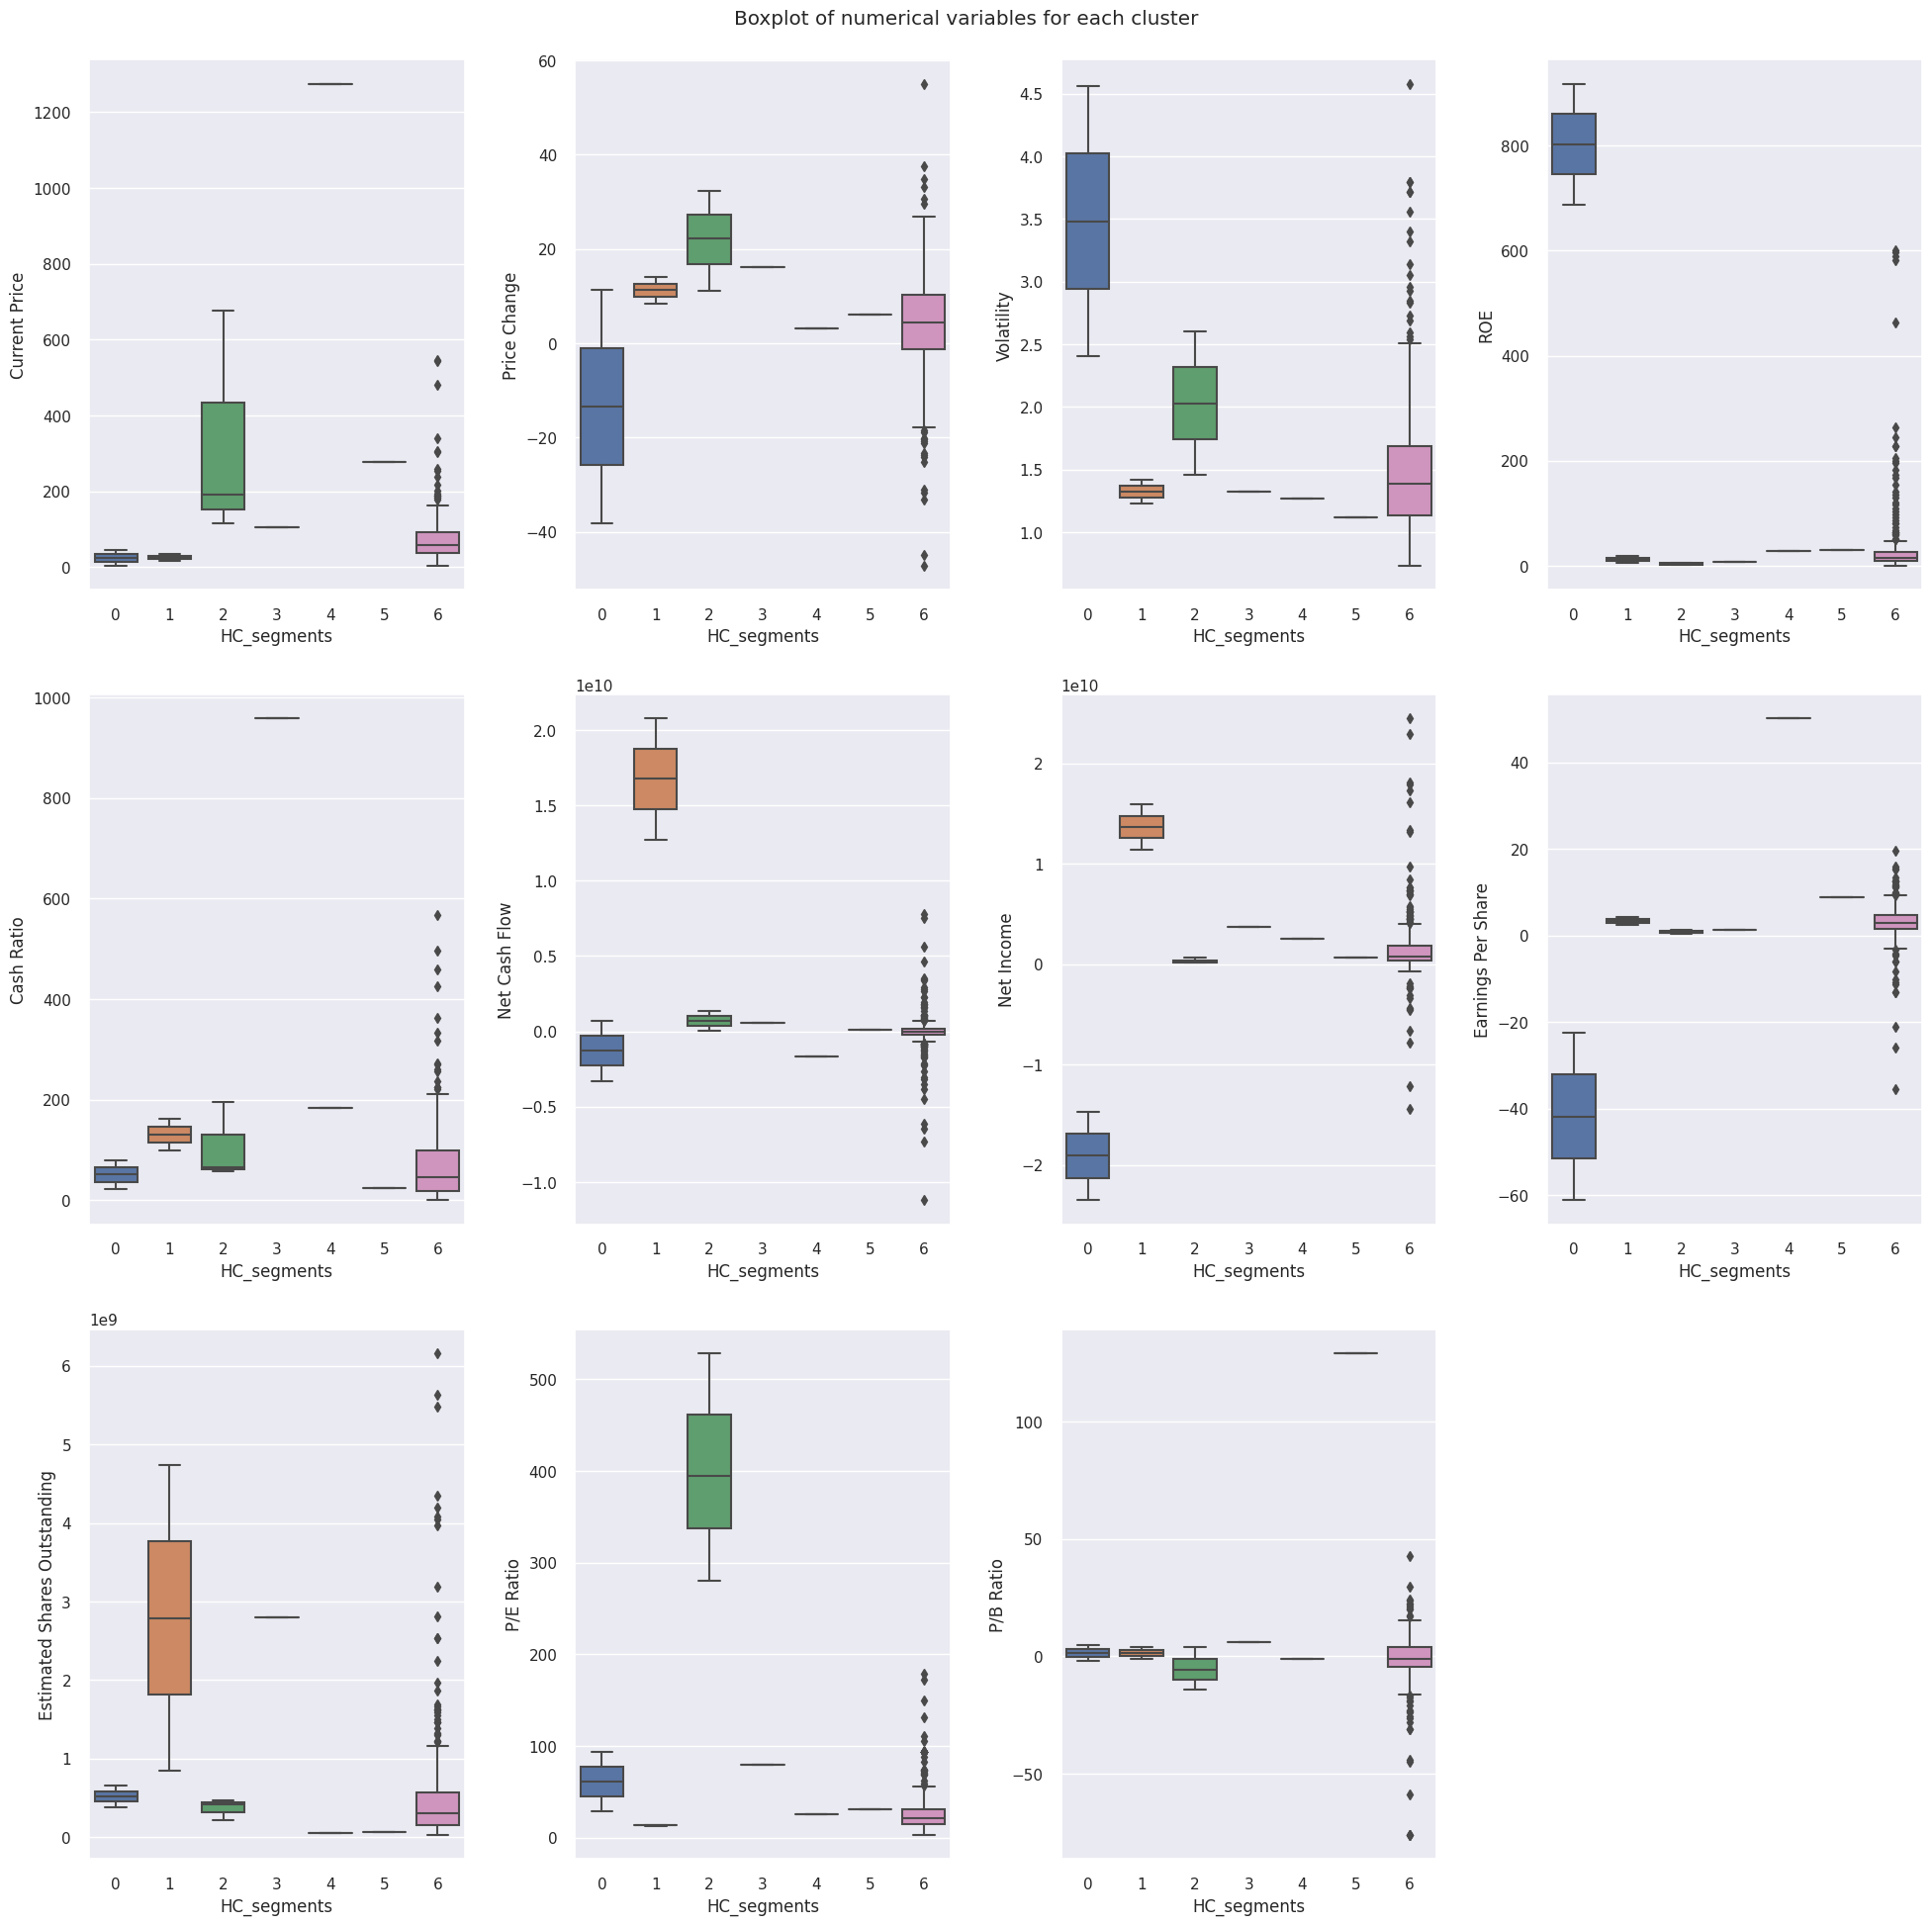

In [ ]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df2, x="HC_segments", y=variable)

plt.tight_layout(pad=2.0)

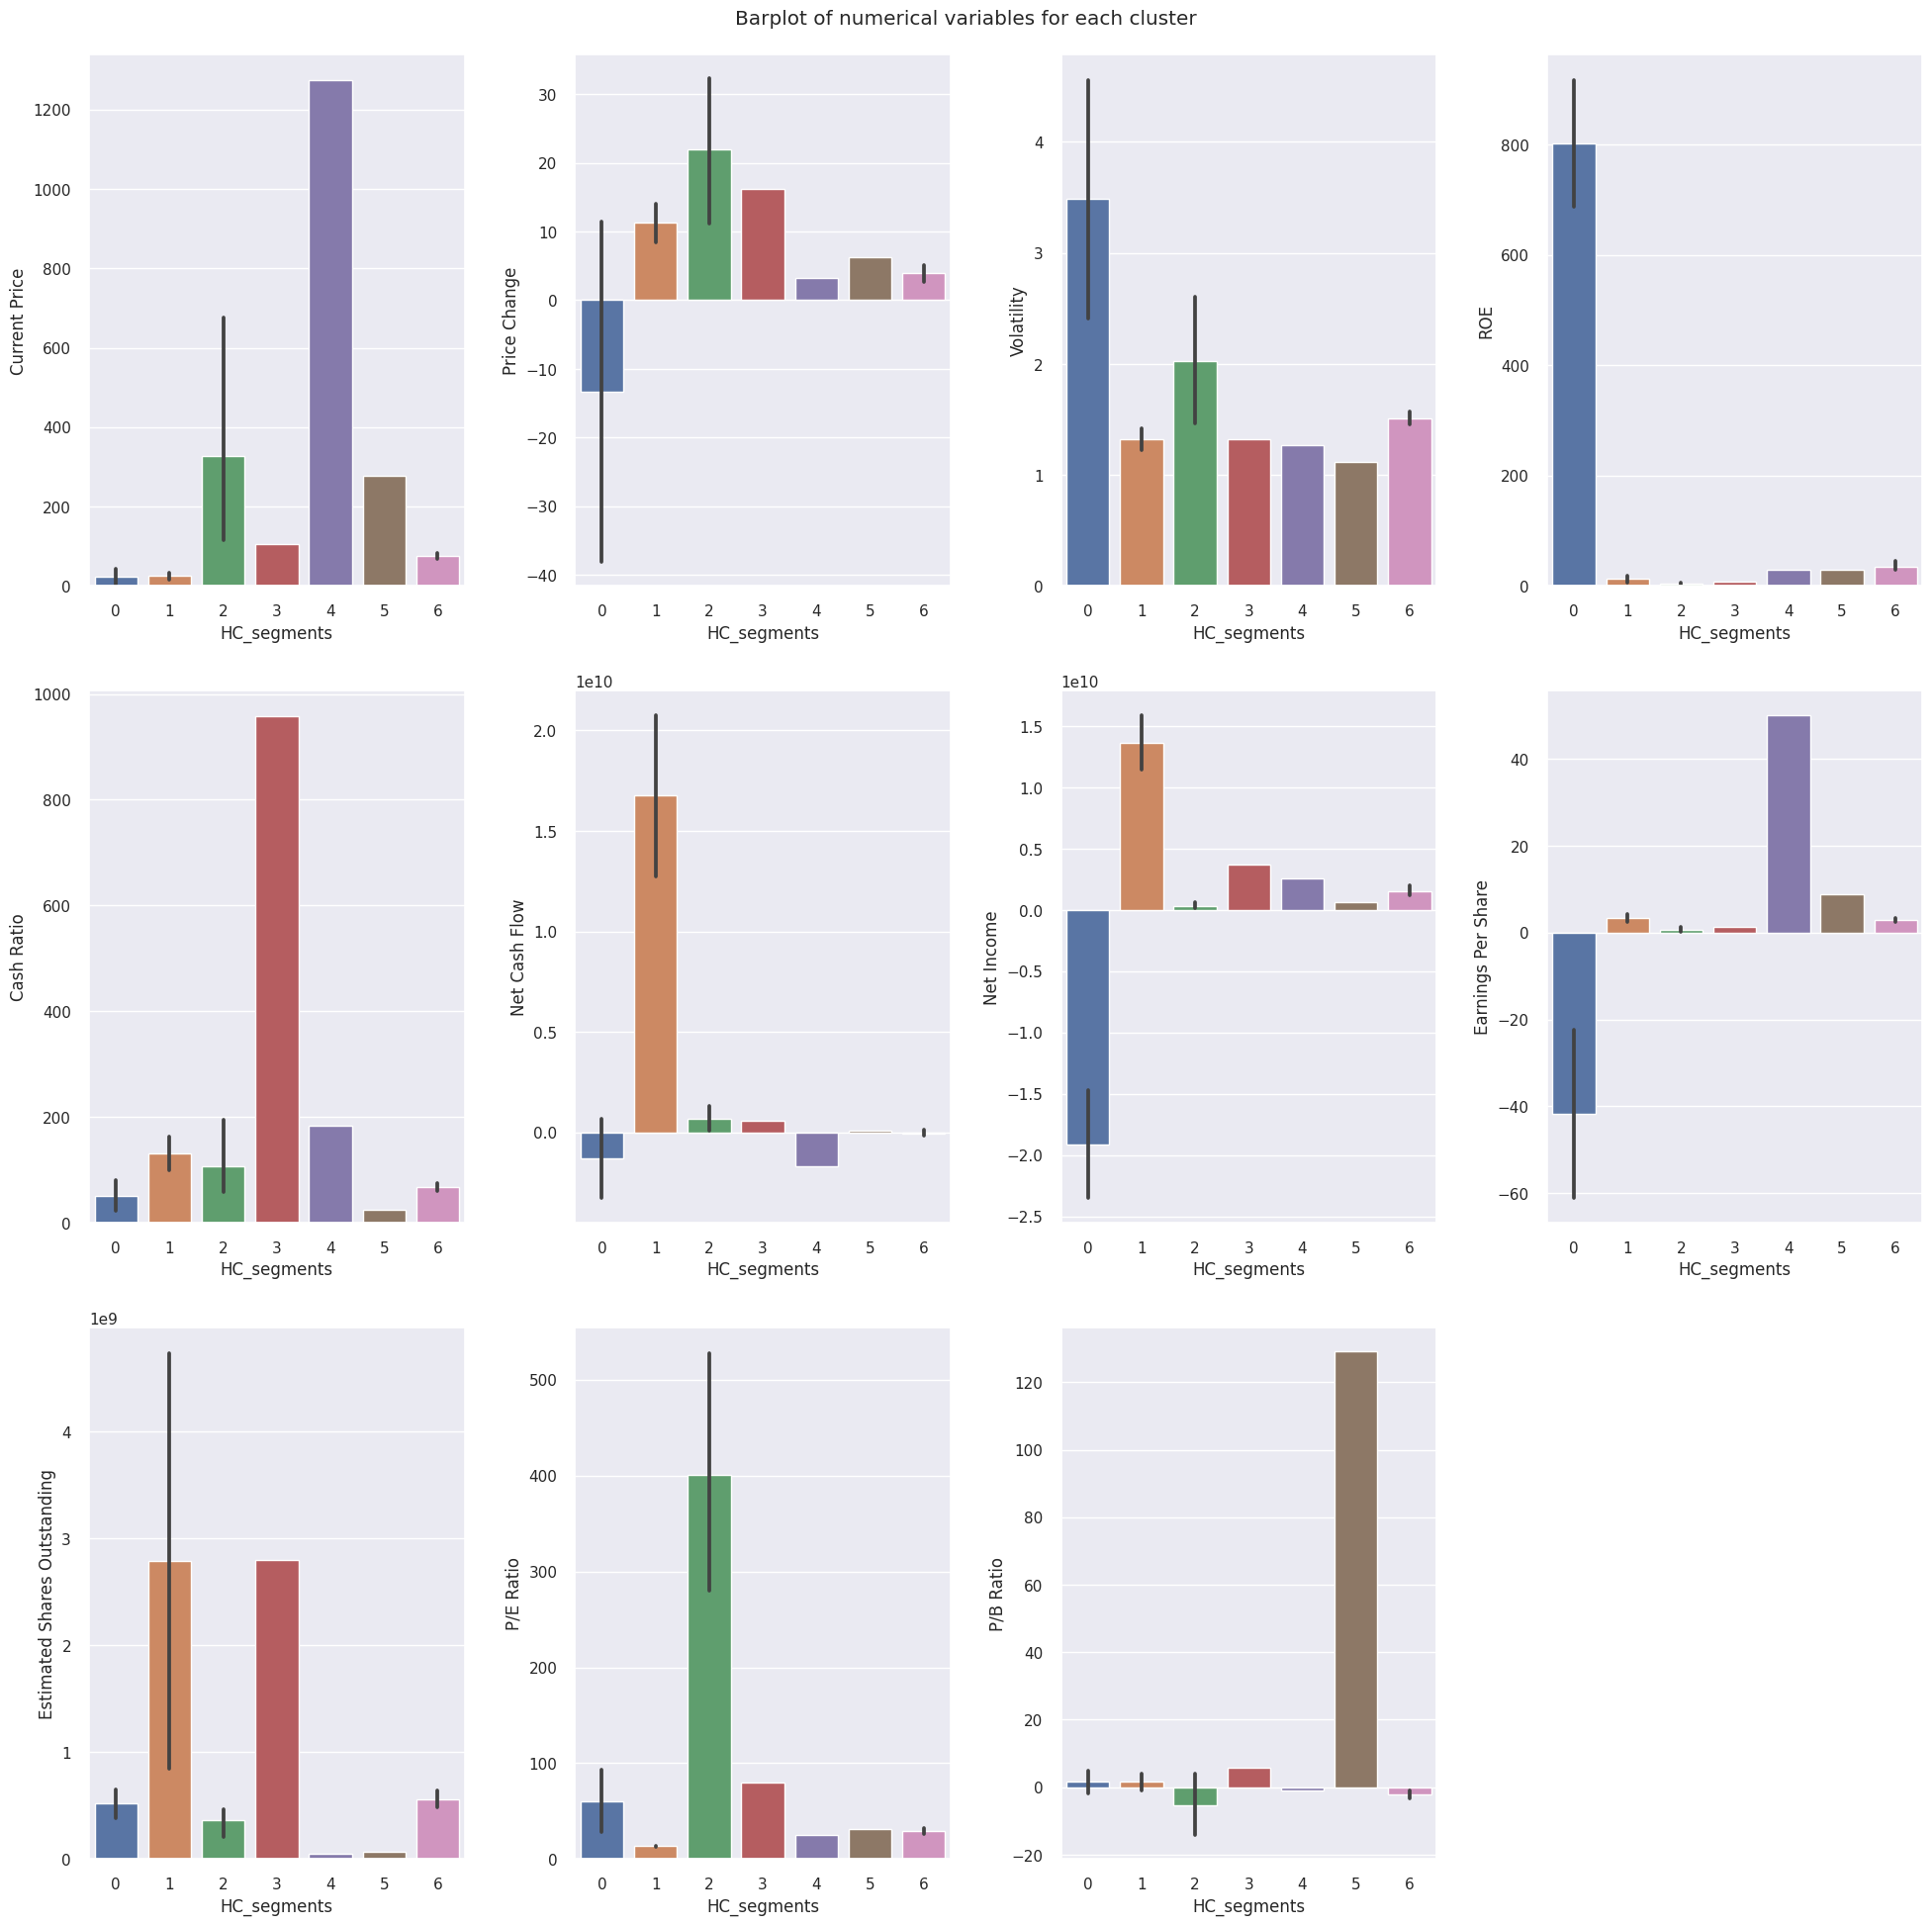

In [ ]:
#Viewing as barplot
plt.figure(figsize=(20, 20))
plt.suptitle("Barplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.barplot(data=df2, x="HC_segments", y=variable)

plt.tight_layout(pad=2.0)

##**Hierarchical Clustering Interpretation**

##**Cluster 0 Interpretation:**

**Current Price:** This cluster contains the lowest current price of the clusters (pretty close to Cluster 1) with an average current price of approximately $24.49.

**Price Change:** In terms of Price Change it is notably the most negative at an average of around -13.35 (with a wide range of data). In other words, the stock prices of this cluster tend to go down at the 13 week mark. 

**Volatility:** In terms of volatility, it ranks the highest at an average of around 3.49 (also with wide range), meaning these stocks in Cluster 0 are more unstable.  

**ROE:**
Return on investment is the best by far of the clusters at an average of 802.00 (maybe given the low current price and the fact it goes down this could be a factor). 

**Cash Ratio:**
In terms of Cash Ratio, this cluster is at: 51.00. The second lowest of the clusters. Anything above 1 in the stock industry is considered good. 

**Net Cash Flow:**
Net Cash Flow for Cluster 0 is the second lowest, and negative at -1292500000.00. Negative cash flow can indicate poor financial health. 

**Net Income:**
Net income is by far the lowest of these clusters at a very negative value (compared to others) at an average of -19106500000.00; indicating a loss in profits for these companies in these clusters. 
 
**Earnings Per Share:**
Earnings per share are notably the most negative and the worst of the clusters at an average of around -41.82. An optimal number would be around 80. 

**Estimated Shares Outstanding:**
For Estimated Shares outstanding, Cluster 0 is not the worst, but not the best compared to the other clusters at at average of around 519573983.25. In most cases, the value of each share is inversely related to the number of shares outstanding. 


**P/E Ratio:**
P/E Ratio for Cluster 0 is the third highest, but still pretty far behind Cluster 2 at an average of around 60.75. However, an ideal P/E Ratio is around 20-25 (and sometimes 30), so this feature could indicate that this cluster has overzealous growth potential and could be overvalued. Given the negative values for net income, earnings per share, etc. this could be the case.    

**P/B Ratio:**
When compared to other Clusters, Cluster 0 has a positive P/B ratio and is pretty low yet similar to other Clusters (minus Cluster 5 of which has a very large P/B ratio). Cluster 0's P/B ratio is at an average at about 1.57. Though with some other values being negative, i.e. net income and earnigns per share, perhaps Cluster 0 could be comprised of overvalued stocks.   

##**Cluster 1 Interpretation:**

**Current Price:** This cluster contains the second lowest current price of the clusters (pretty close to Cluster 0) with an average current price of $25.64.

**Price Change:** In terms of Price Change, Cluster 1 has the third highest values at an average of around: 11.24. In other words, the stock prices of this cluster tend to go up at the 13 week mark. 

**Volatility:** In terms of volatility, it ranks pretty similar to clusters 3 and 4 at around 1.32, meaning these stocks in Cluster 1 are slightly unstable. 

**ROE:**
Return on investment is not great and similar to other clusters (minus Cluster 0, which has a very large return on investment compared to the other clusters). Cluster 1 is not at the lowest, but certainly not the highest at an average value of 12.50. 

**Cash Ratio:**
In terms of Cash Ratio, this cluster has the third highest value when compared to other clusters at an average of around 130.50. Anything above 1 in the stock industry is considered good.

**Net Cash Flow:**
Net Cash Flow for Cluster 1 is by far the highest of the clusters at an average of 16755500000.00. Positive cash flow can indicate good financial health. 

**Net Income:**
Net income for Cluster 1 is by far the highest of these clusters at an average of 13654000000.00; this likely indicates thriving financials and profitability. 
 
**Earnings Per Share:**
Earnings per share for Cluster 1 is at around 3.30. Compared to the other clusters, this value is neither super high or super low--it is pretty unremarkable. An optimal number would be around 80. 

**Estimated Shares Outstanding:**
For Estimated Shares outstanding, Cluster 1's average is at the second highest compared to other clusters and very close to the average of Cluster 3 at around 	2791829362.10. Data for this Cluster in this feature is pretty wide in terms of range. There could be some dilution. In most cases, the value of each share is inversely related to the number of shares outstanding.  

**P/E Ratio:**
P/E Ratio for Cluster 1 is the lowest of the clusters at an average of around 13.65. However, an ideal P/E Ratio is around 20-25 (and sometimes 30), so this feature could indicate that this cluster has a current stock price that is low relative to earnings.

**P/B Ratio:**
When compared to other clusters, Cluster 1 has a positive P/B ratio and is pretty low yet similar to other clusters, namely, cluster 0 (minus Cluster 5 of which has a very large P/B ratio). Cluster 1's P/B ratio is at an average at about 1.51. Stocks in this cluster may be undervalued. 

##**Cluster 2 Interpretation:**

**Current Price:** This cluster contains the second highest current price of the clusters (but still pretty far from the highest seen in Cluster 4). Cluster 2 has an average price of around 327.01 (it is worth noting that this data is also unbalanced in range).

**Price Change:** In terms of Price Change, Cluster 2 has the highest values at an average of around: 21.92. In other words, the stock prices of this cluster tend to go up at the 13 week mark. 

**Volatility:** In terms of volatility, Cluster 2 is the second highest at an average of around 2.03, meaning these stocks in Cluster 2 are more unstable.  

**ROE:**
Return on investment is not great the lowest of the other clusters. The value of ROE for Cluster 2 is an average value of 4.00. 

**Cash Ratio:**
In terms of Cash Ratio, Cluster 2 is on the lower average side compared to the other clusters (but certainly not the lowest) at an average of 106.00. Anything above 1 in the stock industry is considered good.

**Net Cash Flow:**
Net Cash Flow for Cluster 2 is an average of around 698240666.67 (close to Cluster 3). Compared to the other clusters, this value is positive, but neither super high or super low. Positive cash flow can indicate good financial health.  

**Net Income:**
Net income for Cluster 2 is the second lowest of these clusters--however it is still positive at an average of around 287547000.00. 

**Earnings Per Share:**
Earnings per share for Cluster 2 is around an average of 0.75. Compared to the other clusters, this value is the second lowest, however still positive. An optimal number would be around 80. 

**Estimated Shares Outstanding:**
For Estimated Shares outstanding, Cluster 2's average is at around 366763235.30. There could be some overzealous growth potential here given it's second highest stock prices. In most cases, the value of each share is inversely related to the number of shares outstanding.  

**P/E Ratio:**
P/E Ratio for Cluster 2 is the highest by far of the clusters at an average of around 400.99. However, an ideal P/E Ratio is around 20-25 (and sometimes 30), so this feature could indicate that this cluster has stocks that are overvalued. 

**P/B Ratio:**
When compared to other clusters, Cluster 2 the worst P/B ratio at an average of around -5.32. This cluster may have more total liabilities than assets. 

##**Cluster 3 Interpretation:**

**Current Price:** This cluster contains a pretty average price compared to the other clusters at an average of around $104.67.

**Price Change:** In terms of Price Change, Cluster 3 has a positive value and appears average compared to other clusters at an average of around: 16.22. In other words, the stock prices of this cluster tend to go up at the 13 week mark. 

**Volatility:** In terms of volatility, Cluster 3 is pretty average compared to others but still slightly unstable at an average of around 1.32.

**ROE:**
Return on investment is not great and is the second lowest of the other clusters. The value of ROE for Cluster 3 is an average value of 8.00. 

**Cash Ratio:**
In terms of Cash Ratio, Cluster 3 is by far the highest at an average value of around 	958.00. Anything above 1 in the stock industry is considered good.

**Net Cash Flow:**
Net Cash Flow for Cluster 3 is an average of 592000000.00 (closest to Cluster 2). Compared to the other clusters, this value is positive, but neither super high or super low. Positive cash flow can indicate good financial health.  

**Net Income:**
Net income for Cluster 3 is the second highest of these clusters (however still far behind Cluster 1) at an average of 3669000000.00. 

**Earnings Per Share:**
Earnings per share is at an average of around 1.31--not the lowest, but not the highest compared to the other clusters. Still positive though. An optimal number would be around 80. 

**Estimated Shares Outstanding:**
For Estimated Shares outstanding, Earnings per share for Cluster 3 is around an average of 2800763359.00-the highest of all the clusters yet similar to Cluster 2. There could be some overzealous growth potential here given it's average stock prices, however, net income is the second highest--warrants further investigation. In most cases, the value of each share is inversely related to the number of shares outstanding.  

**P/E Ratio:**
P/E Ratio for Cluster 3 is pretty average compared to the other clusters at average of around 79.89. However, an ideal P/E Ratio is around 20-25 (and sometimes 30), so this feature could indicate that this cluster has stocks that are overvalued. 

**P/B Ratio:**
When compared to other clusters, Cluster 3 the second highest P/B ratio at an average of around 5.88 (but still far behind Cluster 5). This cluster could be overvalued. 

##**Cluster 4 Interpretation:**

**Current Price:** This cluster contains the highest current price by far compared to the other clusters at an average of around $ 1274.95.

**Price Change:** In terms of Price Change, Cluster 4 has a positive value and is the second lowest to other clusters at an average of around: 3.19. In other words, the stock prices of this cluster tend to go up at the 13 week mark but not by a monumentus amount. 

**Volatility:** In terms of volatility, Cluster 4 is pretty average compared to others (close to Cluster 3) but still slightly unstable at an average of around 1.27.

**ROE:**
Return on investment is not great, on a higher average of the clusters (but still very far from Cluster 0) and still on a lower end relatively speaking on the graph. The value of ROE for Cluster 4 is an average value of 29.00 (very similar to Cluster 5).  

**Cash Ratio:**
In terms of Cash Ratio, Cluster 4 the second highest an average value of around 184.00 (although still far from Cluster 3). Anything above 1 in the stock industry is considered good.

**Net Cash Flow:**
Net Cash Flow for Cluster 4 is the lowest of the clusters at an average of around -1671386000.00. Negative cash flow can indicate poor financial health.

**Net Income:**
Net income for Cluster 4 is a bit on the higher than average side of things, but still not super notable compared to other clusters at an average of around 2551360000.00. 

**Earnings Per Share:**
Earnings per share is the highest by far of the clusters at an average of around 50.09. An optimal number would be around 80. 

**Estimated Shares Outstanding:**
For Estimated Shares outstanding, Earnings per share for Cluster 4 is the lowest of the clusters at an average of 50935516.07. Perhaps Cluster 4 has more closely-held shares than others. In most cases, the value of each share is inversely related to the number of shares outstanding.  

**P/E Ratio:**
P/E Ratio for Cluster 4 is the second lowest compared to the other clusters at average of around 25.45. An ideal P/E Ratio is around 20-25 (and sometimes 30), so this feature falls within optimal limits. This stock likely is properly valued, but given net cash flow, further investigation may be needed. 

**P/B Ratio:**
When compared to other clusters, Cluster 4 is in the negatives, but not the worst compared to other clusters at an average of around -1.05. Maybe Cluster 4 has stocks/companies losing money? Warrants a closer look. 

##**Cluster 5 Interpretation:**

**Current Price:** This cluster contains the third highest current price (but still far from Cluster 4) compared to the other clusters at an average of around $276.57.

**Price Change:** In terms of Price Change, Cluster 5 has a positive value and is a little on the higher average of the clusters at an average of around: 6.19. In other words, the stock prices of this cluster tend to go up at the 13 week mark but not by a monumentus amount. 

**Volatility:** In terms of volatility, Cluster 5 is pretty average compared to others, but has the lowest value of an average of around 1.12. Still slightly unstable, but the least unstable of the clusters. 

**ROE:**
Very similar to Cluster 4, Cluster 5's return on investment is not great, on a higher average of the clusters (but still very far from Cluster 0) and still on a lower end relatively speaking on the graph. The value of ROE for Cluster 5 is an average value of 30.00.   

**Cash Ratio:**
In terms of Cash Ratio, Cluster 5 has the lowest average value of around 25.00. Anything above 1 in the stock industry is considered good.

**Net Cash Flow:**
Net cash flow for Cluster 5 compared to others is pretty neutral, yet still positive at an average of around 90885000.00. Positive cash flow can indicate good financial health.

**Net Income:**
Net income for Cluster 5 is the third lowest of the clusters (yet still positive) at an average of around 596541000.00. It is better to have a positive net income. 

**Earnings Per Share:**
Earnings per share is the second highest of the clusters (but still quite behind Cluster 4) at an average of around 8.91. An optimal number would be around 80. 

**Estimated Shares Outstanding:**
For Estimated Shares outstanding, Earnings per share for Cluster 5 is the second lowest of the clusters at an average of around 66951851.85. Perhaps Cluster 5 has more closely-held shares than others. In most cases, the value of each share is inversely related to the number of shares outstanding.  

**P/E Ratio:**
P/E Ratio for Cluster 5 is similar to Cluster 6 and slightly higher than Cluster 4 at an average of around 	31.04. An ideal P/E Ratio is around 20-25 (and sometimes 30). Given other pretty decent values this feature likely falls within optimal limits. Yet, further investigation may be needed. 

**P/B Ratio:**
When compared to other clusters, Cluster 5 has the highest P/B ratio by far at an average of around 129.06 (of course P/B varies by industry and further investigation may be needed). A very high P/B ratio tends to indicate a stock is overvalued, but again further investigation may be needed. 

##**Cluster 6 Interpretation:**

**Current Price:** Cluster 6 has a rather unremarkable current price compared to the other clusters (but still higher than the lowest two) at an average of around $75.02. 

**Price Change:** In terms of Price Change, Cluster 6 is around Cluster 4, with a positive value and is at an average of around: 3.94. In other words, the stock prices of this cluster tend to go up at the 13 week mark but not by a monumentus amount. 

**Volatility:** In terms of volatility, Cluster 6 is the third most volatile of the clusters at an average of around 1.51; thus Cluster 6 is more volatile than 4 other clusters, but not by a ton. 

**ROE:**
Very similar to Cluster 4 and Cluster 5, Cluster 6's return on investment is not great, on a higher average of the clusters (but still very far from Cluster 0) and still on a lower end relatively speaking on the graph. The value of ROE for Cluster 6 is an average value of 35.62.   

**Cash Ratio:**
In terms of Cash Ratio, Cluster 6 is pretty average/low average compared to the other clusters at an average of around 66.55. Anything above 1 in the stock industry is considered good. 

**Net Cash Flow:**
Net cash flow for Cluster 6 compared to others is a negative value yet not too bad compared to some others like Cluster 0 and Cluster 4. Net cash flow for Cluster 6 is an average of around -39846757.58. Negative cash flow can indicate poor financial health. Maybe credit or other means are being used--warrants further investigation given cash ratio and net income are positive. 

**Net Income:**
Net income for Cluster 6 is on the lower end of the clusters (yet still positive) at an average of around 1549443100.000000. It is better to have a positive net income. 

**Earnings Per Share:**
Earnings per share for Cluster 6 is on a lower average of the clusters at an average of around 2.90 but still higher than others. An optimal number would be around 80. 

**Estimated Shares Outstanding:**
For Estimated Shares outstanding, Cluster 6 is not the worst and is the third highest compared to the other clusters (but not by much) at at average of around  562266326.41. In most cases, the value of each share is inversely related to the number of shares outstanding. 
 

**P/E Ratio:**
P/E Ratio for Cluster 6 is similar to Cluster 5 at an average of around 29.09. An ideal P/E Ratio is around 20-25 (and sometimes 30). Given other negative values (i.e. net cash flow and P/B ratio) this feature likely falls within overvalued limits. Yet, further investigation may be needed. 

**P/B Ratio:**
When compared to other clusters, Cluster 6 has is in the negatives and has the second lowest P/B ratio at an average of around -2.15. Maybe given negative net income, Cluster 6 has stocks/companies losing money? Warrants a closer look. 

## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

You compare several things, like:
- Which clustering technique took less time for execution?


In terms of K-means clustering, the Elbow Method that showed 6 clusters was "optimal" was subsequently the least taxing and most straight-forward (and  interestingly enough produced fewer clusters than other methods of which is makes for quicker analysis). Yet, by implementing a cross-validation via the Silhouette Method, I felt this step provided likely a more accurate depiction of the optimal clusters for this data (although clustering in general has subjective aspects). It is worth noting that it took me trial and error to find a decent positive silhouette coefficient value that didn't have a ton of negative features in the graph. That being said though, even with more clusters and more time spent during the cluster determination and analysis phase, it was worth it to pick the Silhouette Method. However, 8 clusters was a lot to digest.  

Yet, this question is not answered completely without discussing how the K-means techniques compared/contrasted to the Hierarchical Clustering techniques. Although it took me some brain power to figure out where to "draw the line" to count the breaks in the dendrograms (again this is subjective), it took me less time total than the trial and error brought on by the Silhouette Method. I finally settled on 7 for the Hierarchical Method (of which was 1 less than the Silhouette Method) and made for a slightly quicker analysis. Although 7 is still a lot of clusters for analysis and digesting, because the total cluster selection and analysis process took less time, I preferred the Hierarchical Clustering technique in this case. 

- Which clustering technique gave you more distinct clusters, or are they the same?

Cluster Technique Breakdowns: 

(Elbow: 6) 

Silhouette: 8

Hierarchical: 7 

Pretty similar, but not equal. 

- How many observations are there in the similar clusters of both algorithms?


I noticed that for both Silhouette and Hierarchical, there was a cluster with a much larger **count** in both--the companies within these were pretty similar as well. Namely, in the Silhouette Method, Cluster 2 had a count of 264 (the overwhelming majority cluster). Similarly in the Hierarchical Method, Cluster 6 had a count of 330 (also the overwhelming majority cluster). 

In addition, for other clusters, **current price** seems to be very similar in these methods for some features: 

Silhouette Method, Cluster 6, 24.49; Hierarchical Cluster 0, 24.49,

Silhouette Method Cluster 7: 327.01; Hierarchical Cluster 2 327.01. 

Next, **price change** was very similar in some features of clusters in both methods. For instance: 

Silhouette Method Cluster 6 is at -13.32; Hierarchical Cluster 0, -13.35, 

Silhouette Cluster 7, 21.92; Hierarchical Cluster 2, 21.92. 

Next, **volatility** is similar in some features of the clusters in both methods: 

Silhouette Method Cluster 6 at 3.48; Hierarchical Cluster 0, 3.49

Silhouette Method Cluster 2, 1.37; Hierarchical Clusters 1 and 3, 1.32

Sihouette Method Cluster 5, 1.13; Hierarchical Cluster 5, 1.12

Sihouette Method Cluster 1, 1.51; Hierarchical Cluster 6, 1.50

As for **Return on Investment (ROE)**, the similarities are as follows: 

Silhouette Method Cluster, 6, 802.00; Hierarchical Cluster 0, 802.00, 

Silhouette Method Cluster 7, 4.00; Hierarchical Cluster 2, 4.00, 

Silhouette Method Cluster 0, 28.10 ; Hierarchical Cluster 4, 29.00,

Silhouette Method Cluster 5, 31.09, ; Hierarchical Cluster 5, 30.00.

As for **Cash Ratio**, the similarities are as follows: 

Silhouette Method Cluster, 2, 51.09; Hierarchical Cluster 0, 51.00, 

Silhouette Method Cluster 7, 698240666.67; Hierarchical Cluster 2, 698240666.67, 

Silhouette Method Cluster 4, 26.60 ; Hierarchical Cluster 5, 25.00. 

As for **Net Cash Flow**, the similarities are as follows: 

Silhouette Method Cluster, 6, -1292500000.00; Hierarchical Cluster 0, -1292500000.00, 

Silhouette Method Cluster 7, 106.00; Hierarchical Cluster 2, 106.00. 

As for **Net Income**, the similarities are as follows: 

Silhouette Method Cluster, 6, -19106500000.00; Hierarchical Clusters 0, -19106500000.00, and 6, -19106500000.00,

Silhouette Method Cluster 7, 287547000.00; Hierarchical Cluster 2, 287547000.00. 

As for **Earnings Per Share**, the similarities are as follows: 

Silhouette Method Cluster, 6, -41.82; Hierarchical Cluster 0, -41.82.

Silhouette Method Cluster 2, 3.69; Hierarchical Cluster 1, 3.30,

Sihouette Method Cluster 7, 0.75; Hierarchical Cluster 2, 0.75,

Silhouette Method Cluster 4, 1.55; Hierarchical Cluster 3, 1.31.

As for **Estimated Shares Outstanding**, the similarities are as follows: 

Silhouette Method Cluster, 6, 519573983.25; Hierarchical Cluster 0, 519573983.25.

Silhouette Method Cluster 7, 366763235.30; Hierarchical Cluster 2, 366763235,30, 

Silhouette Method Cluster 3, 503031539.06; Hierarchical Cluster 4, 50935516.07,

As for **P/E Ratio**, the similarities are as follows: 

Silhouette Method Cluster, 6, 60.75; Hierarchical Cluster 0, 60.75,

Silhouette Method Cluster 7, 400.99; Hierarchical Cluster 2, 400.99.

As for **P/B Ratio**, the similarities are as follows: 

Silhouette Method Cluster, 6, 1.57; Hierarchical Cluster 0, 1.57,

Silhouette Method Cluster 7, -5.32; Hierarchical Cluster 2, -5.32.


- How many clusters are obtained as the appropriate number of clusters from both algorithms?

Silhouette: 8

Hierarchical: 7 

Pretty similar, but not equal. 

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

The Silhouette Method and Hierarchical Clustering had many similar values for clusters, but also many different values as well. Also, they had different cluster amounts differing by 1. 

In both methods Apache Corporation and Chesapeake Energy had the highest ROE, of which should be explored. 

## Actionable Insights and Recommendations

- For both methods, it appears there is a majority cluster, perhaps this cluster should be digested further and investigated by breaking it into further clusters itself.

- In both methods Apache Corporation and Chesapeake Energy had the highest ROE, of which should be explored. 

- In addition, the negative values for each cluster should be further explored as to what is making them negative--For example, negative earnings may indicate a company is not performing well or may be experiencing a temporary setback. Uncovering these reasons could identify potential risks and opportunities.

- For the clusters that are showing optimal or near optimal values for the industry, it would be wise to investigate what is making them do well. Maybe there are other factors outside of this analysis at play. I.e. maybe the public relations of some clusters is better than others and its making an impact financially. 

- There are clusters with values that are puzzling--such as positive cash flow but negative net income, these disconnects warrant further investigation. 

- Also, it's important to view the clusters holistically in order to gain a better understanding of the overall performance of the stock market. While it's ideal for each variable to be analyzed independently, it's also important to consider the interrelationships between them and how they may be affecting each other. By taking a holistic approach, one can gain a more comprehensive understanding of the factors that are driving the performance of the market, and make more informed investment decisions. 

